In [1]:
#!pip install wfdb  pywavelets 

In [2]:
#Multiple_patient_biosensor_pipeline.py

# ===============================
# Step 0: Import Libraries
# ===============================
import wfdb
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks, welch
from sklearn.ensemble import IsolationForest
from scipy.stats import entropy
import seaborn as sns

In [3]:
# -----------------------------
# Configurations
# -----------------------------
# Folder with all patient data
data_folder = 'C:/Users/NEHA/Machine_Learning_Projects/Anomaly detection in Time series data/Dataset/'
window_size = 100               # Sliding window size for anomaly detection
window_step = 50                # Step size for sliding window


In [4]:
# -----------------------------
# Helper functions
# -----------------------------
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    
    # Fix critical frequency range
    if high >= 1:
        high = 0.99
    if low <= 0:
        low = 0.01
    
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=0.5, highcut=40, fs=125, order=4):
    if fs <= 2*highcut:  # Cannot filter if sampling too low
        return data
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    y = filtfilt(b, a, data)
    return y

def load_patient_signal(file_path):
    record = wfdb.rdrecord(file_path)
    # Example: use first channel
    signal = record.p_signal[:, 0]
    fs = record.fs  # sampling frequency
    return signal, fs

def sliding_windows(signal, window_size, step):
    """Split signal into sliding windows of fixed size."""
    return np.array([signal[i:i+window_size] for i in range(0, len(signal)-window_size+1, step)])

In [5]:


# -----------------------------
# Load and preprocess all patients
# -----------------------------
patient_files = [f.split('.')[0] for f in os.listdir(data_folder) if f.endswith('.dat')]
patient_signals = {}

for patient in patient_files:
    signal, fs = load_patient_signal(os.path.join(data_folder, patient))
    
    # Data cleaning: remove NaNs
    signal = np.nan_to_num(signal)
    
    # Filtering: bandpass to remove noise
    signal = bandpass_filter(signal, lowcut=0.5, highcut=40, fs=fs)
    
    # Normalize per patient
    signal = (signal - np.mean(signal)) / np.std(signal)
    
    patient_signals[patient] = signal


EDA for bidmc01:
Min: -2.96, Max: 2.98, Mean: -0.00, Std: 1.00


<Figure size 600x400 with 0 Axes>

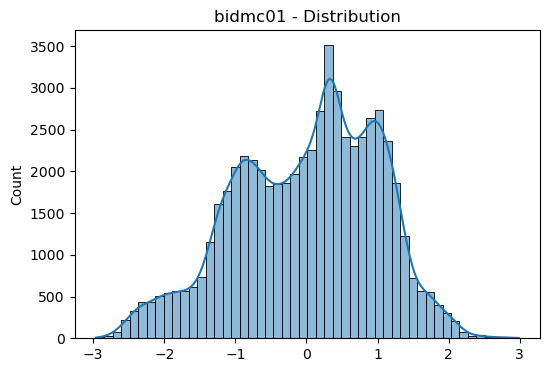


EDA for bidmc01n:
Min: -3.28, Max: 3.64, Mean: -0.00, Std: 1.00


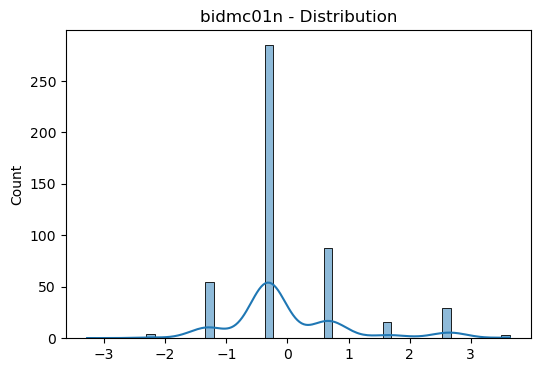


EDA for bidmc02:
Min: -10.27, Max: 5.36, Mean: 0.00, Std: 1.00


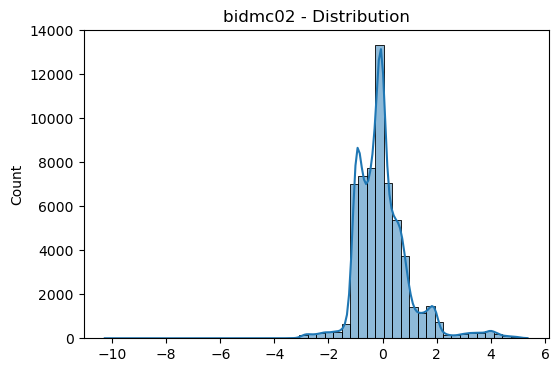


EDA for bidmc02n:
Min: -2.83, Max: 2.73, Mean: -0.00, Std: 1.00


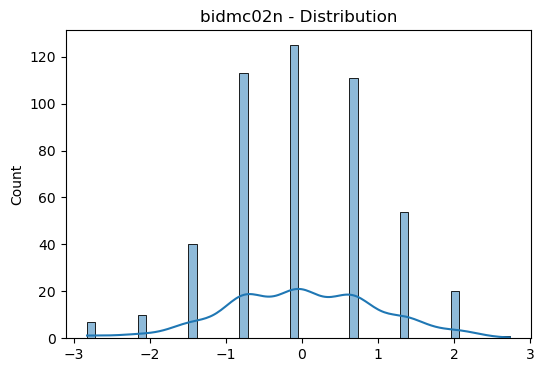


EDA for bidmc03:
Min: -12.94, Max: 10.63, Mean: -0.00, Std: 1.00


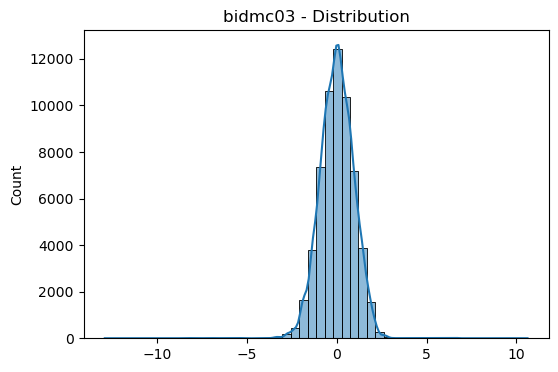


EDA for bidmc03n:
Min: -1.70, Max: 7.18, Mean: 0.00, Std: 1.00


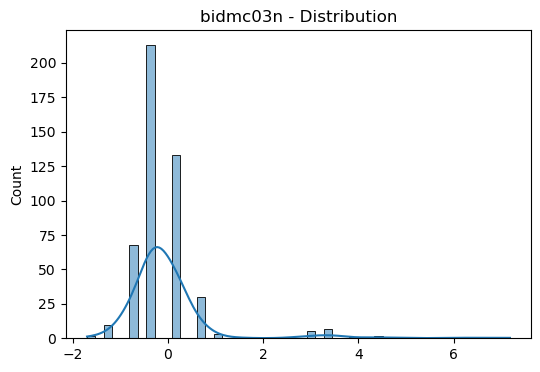


EDA for bidmc04:
Min: -2.30, Max: 5.06, Mean: 0.00, Std: 1.00


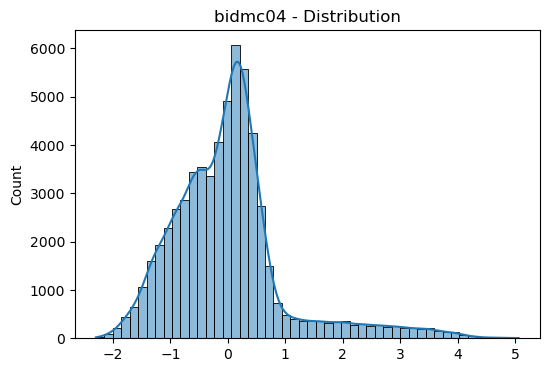


EDA for bidmc04n:
Min: -2.99, Max: 1.78, Mean: 0.00, Std: 1.00


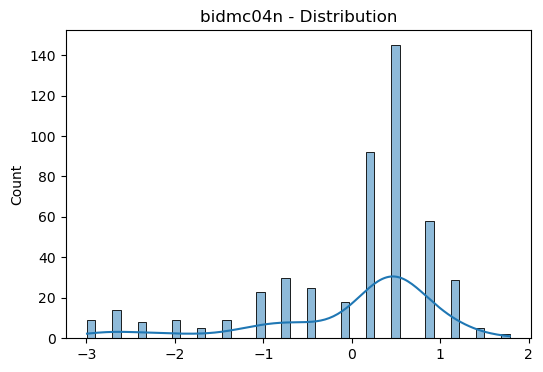


EDA for bidmc05:
Min: -4.31, Max: 4.23, Mean: -0.00, Std: 1.00


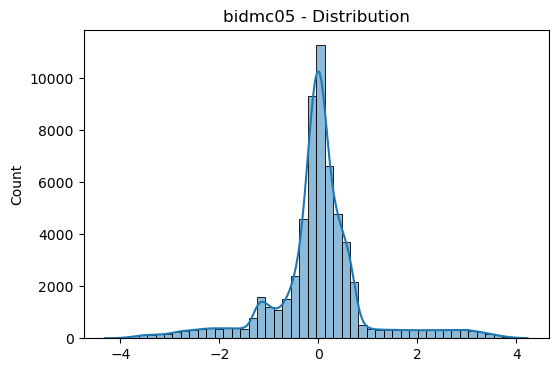


EDA for bidmc05n:
Min: -2.56, Max: 3.23, Mean: -0.00, Std: 1.00


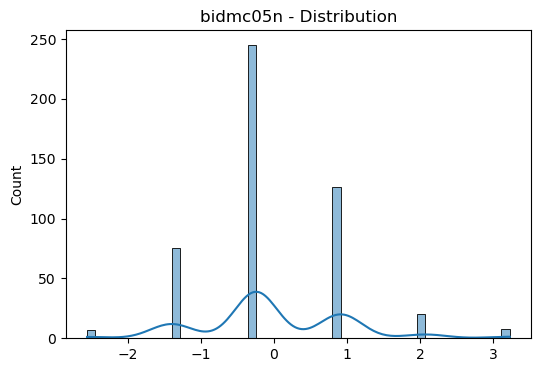


EDA for bidmc06:
Min: -3.42, Max: 3.84, Mean: -0.00, Std: 1.00


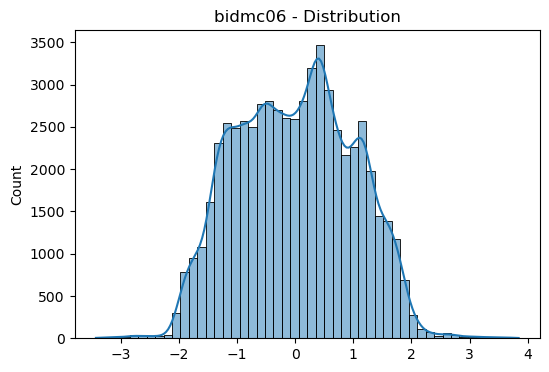


EDA for bidmc06n:
Min: -0.68, Max: 7.37, Mean: 0.00, Std: 1.00


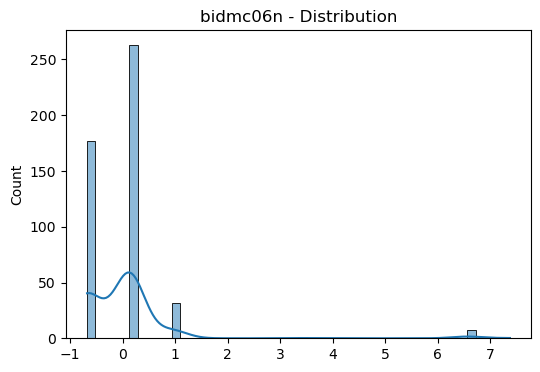


EDA for bidmc07:
Min: -3.05, Max: 2.41, Mean: 0.00, Std: 1.00


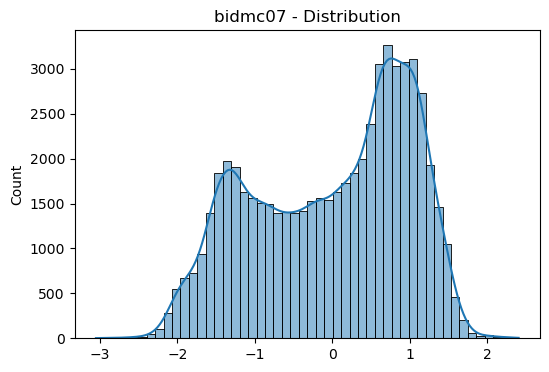


EDA for bidmc07n:
Min: -3.26, Max: 2.68, Mean: 0.00, Std: 1.00


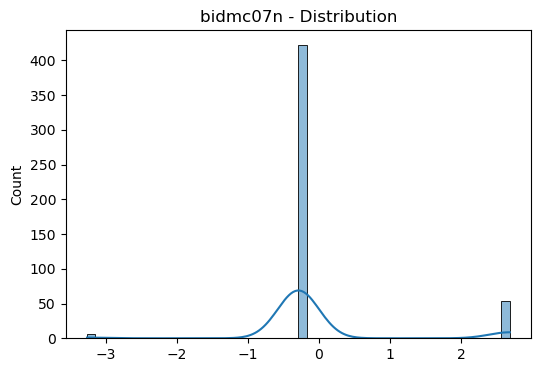


EDA for bidmc08:
Min: -2.16, Max: 3.17, Mean: 0.00, Std: 1.00


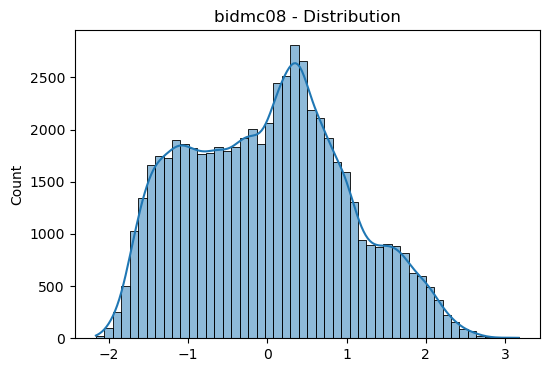


EDA for bidmc08n:
Min: -2.90, Max: 4.54, Mean: 0.00, Std: 1.00


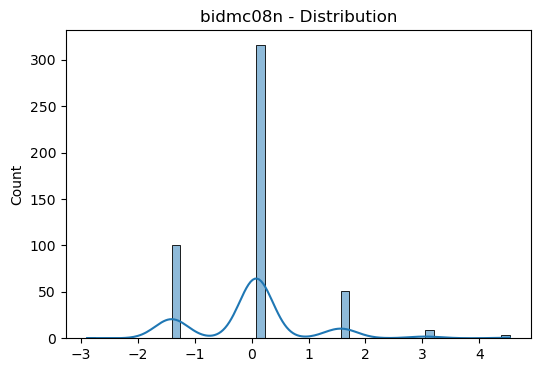


EDA for bidmc09:
Min: -1.81, Max: 3.10, Mean: -0.00, Std: 1.00


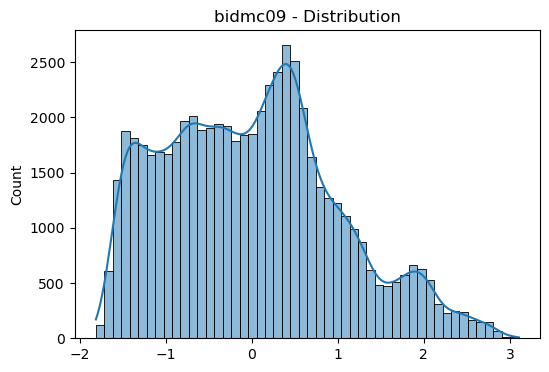


EDA for bidmc09n:
Min: -2.38, Max: 5.83, Mean: -0.00, Std: 1.00


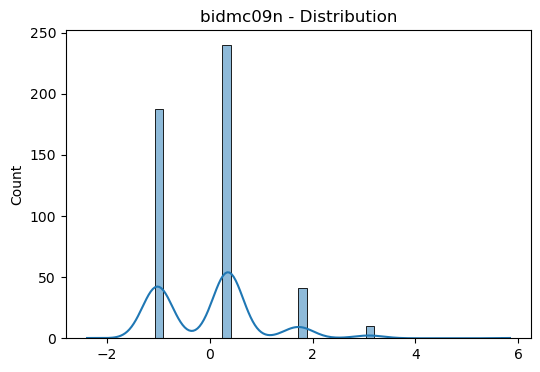


EDA for bidmc10:
Min: -9.05, Max: 12.18, Mean: -0.00, Std: 1.00


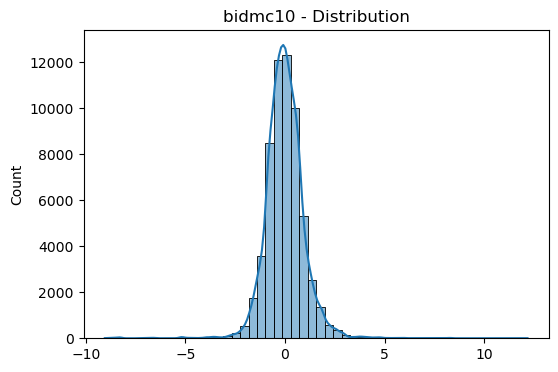


EDA for bidmc10n:
Min: -1.69, Max: 5.29, Mean: -0.00, Std: 1.00


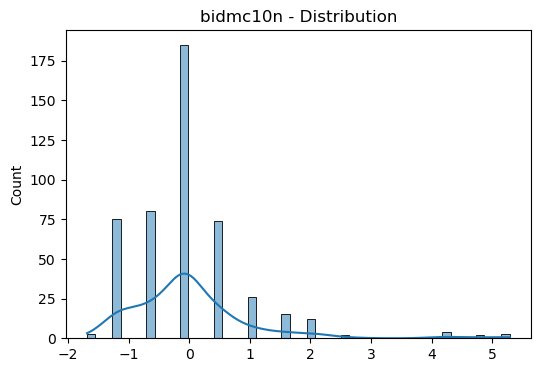


EDA for bidmc11:
Min: -2.46, Max: 4.27, Mean: 0.00, Std: 1.00


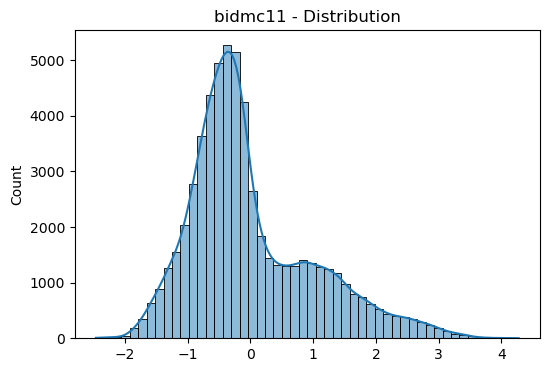


EDA for bidmc11n:
Min: -1.97, Max: 3.96, Mean: 0.00, Std: 1.00


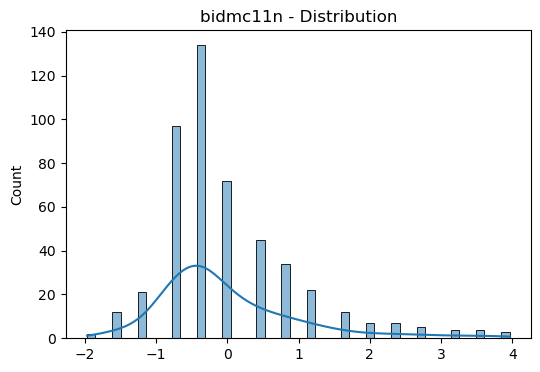


EDA for bidmc12:
Min: -3.36, Max: 3.36, Mean: -0.00, Std: 1.00


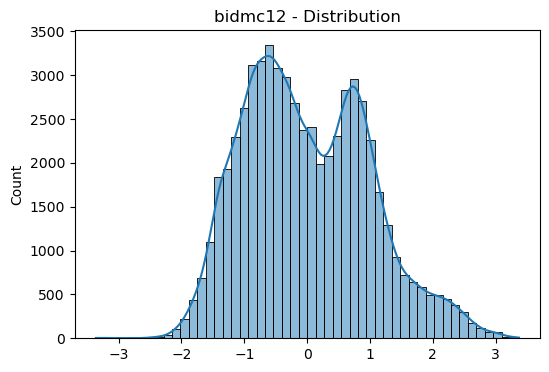


EDA for bidmc12n:
Min: -1.52, Max: 2.25, Mean: -0.00, Std: 1.00


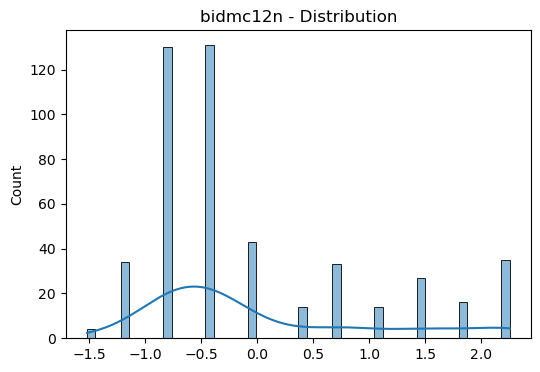


EDA for bidmc13:
Min: -4.91, Max: 5.09, Mean: -0.00, Std: 1.00


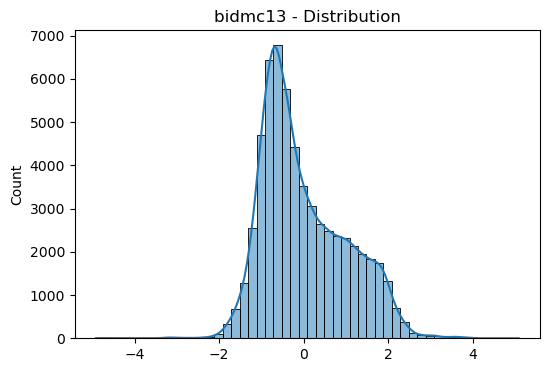


EDA for bidmc13n:
Min: -1.99, Max: 2.87, Mean: -0.00, Std: 1.00


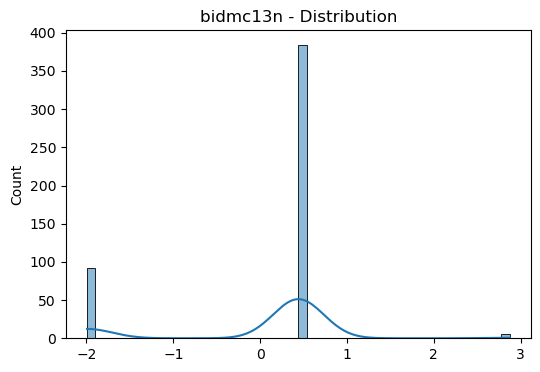


EDA for bidmc14:
Min: -8.66, Max: 13.17, Mean: -0.00, Std: 1.00


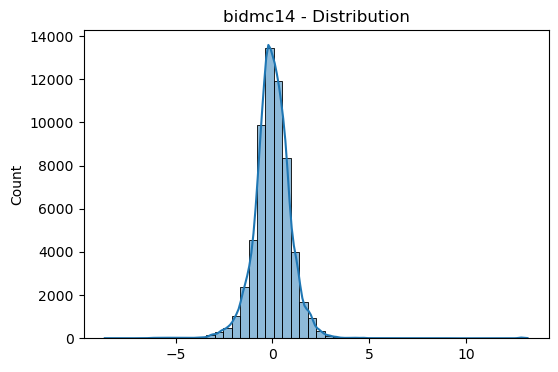


EDA for bidmc14n:
Min: -2.76, Max: 2.38, Mean: -0.00, Std: 1.00


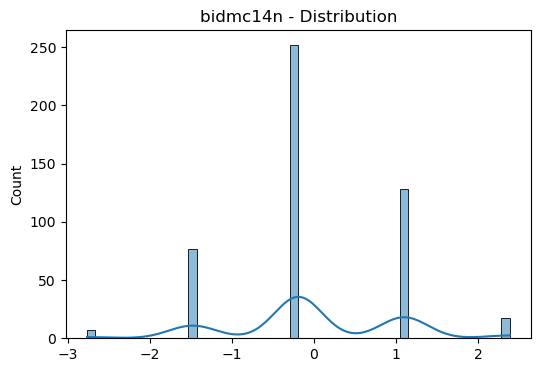


EDA for bidmc15:
Min: -10.84, Max: 9.66, Mean: -0.00, Std: 1.00


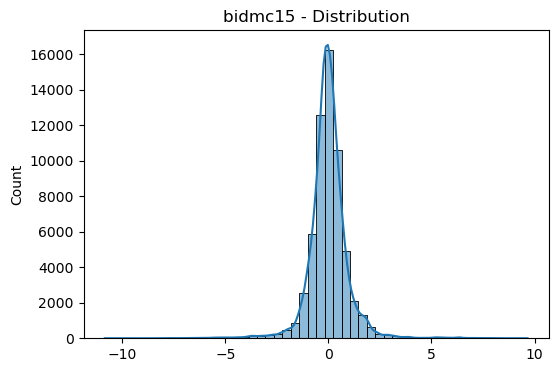


EDA for bidmc15n:
Min: -2.19, Max: 2.45, Mean: -0.00, Std: 1.00


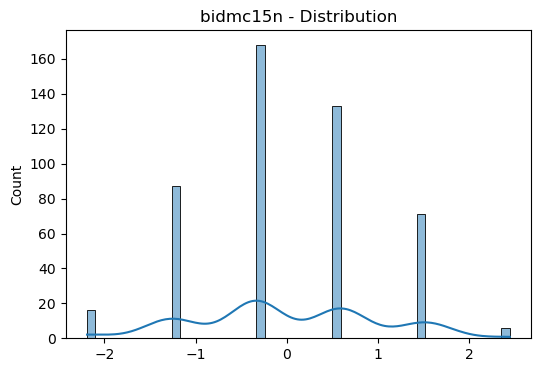


EDA for bidmc16:
Min: -4.50, Max: 4.86, Mean: 0.00, Std: 1.00


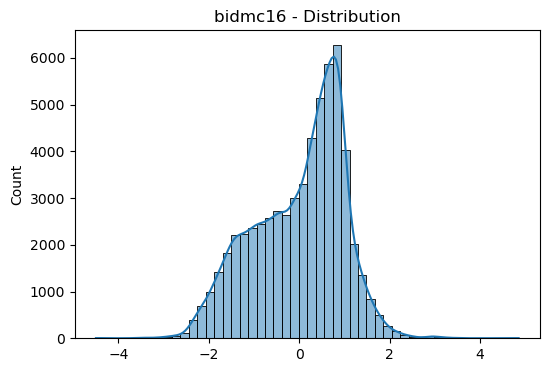


EDA for bidmc16n:
Min: -5.58, Max: 2.58, Mean: -0.00, Std: 1.00


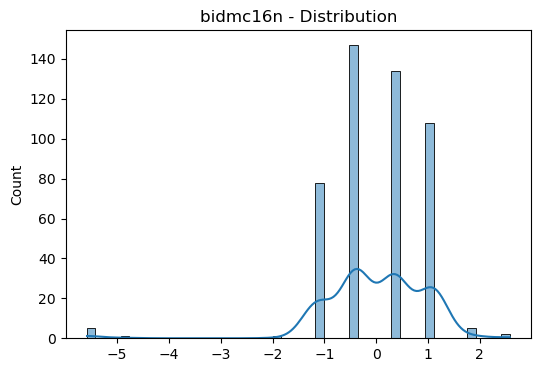


EDA for bidmc17:
Min: -4.65, Max: 3.79, Mean: -0.00, Std: 1.00


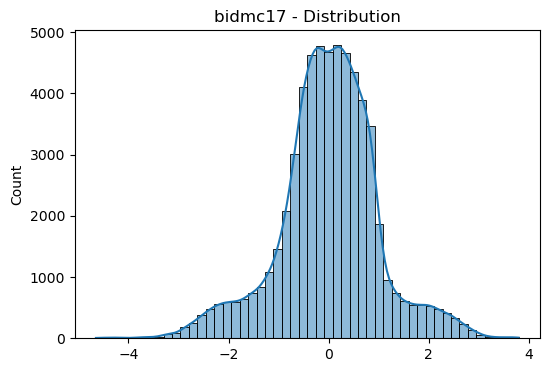


EDA for bidmc17n:
Min: -1.78, Max: 3.27, Mean: 0.00, Std: 1.00


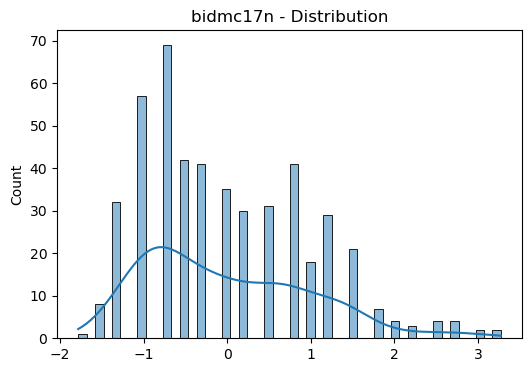


EDA for bidmc18:
Min: -1.90, Max: 3.50, Mean: 0.00, Std: 1.00


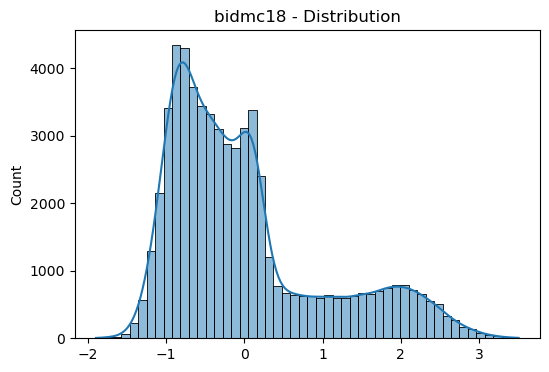


EDA for bidmc18n:
Min: -2.46, Max: 2.04, Mean: -0.00, Std: 1.00


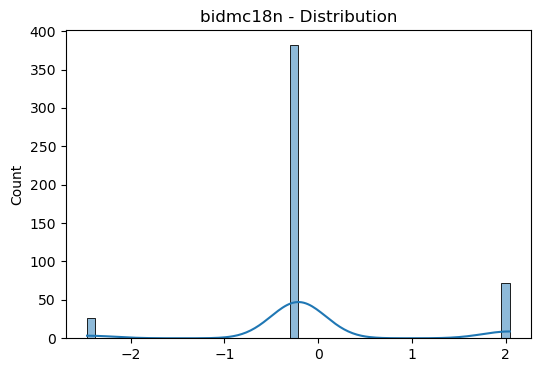


EDA for bidmc19:
Min: -7.89, Max: 7.60, Mean: -0.00, Std: 1.00


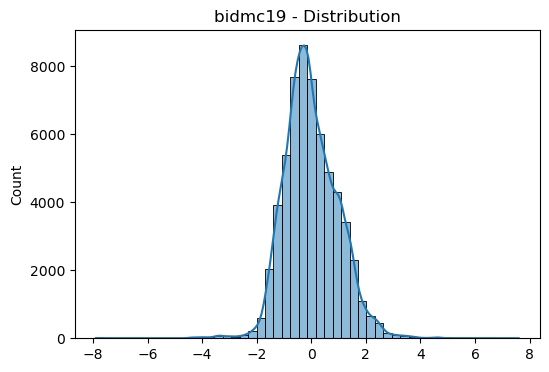


EDA for bidmc19n:
Min: -2.06, Max: 3.77, Mean: 0.00, Std: 1.00


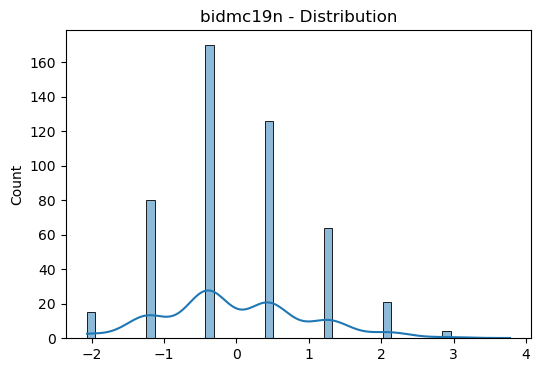


EDA for bidmc20:
Min: -3.35, Max: 4.95, Mean: -0.00, Std: 1.00


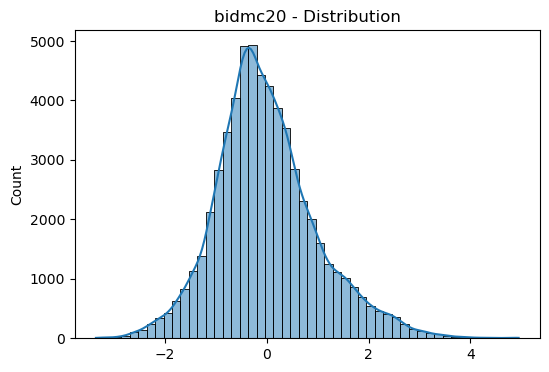


EDA for bidmc20n:
Min: -2.33, Max: 2.35, Mean: 0.00, Std: 1.00


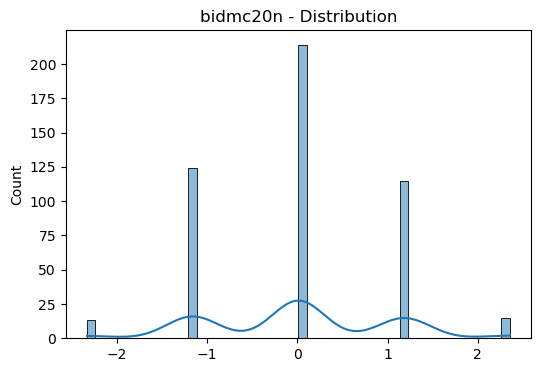


EDA for bidmc21:
Min: -5.61, Max: 4.13, Mean: -0.00, Std: 1.00


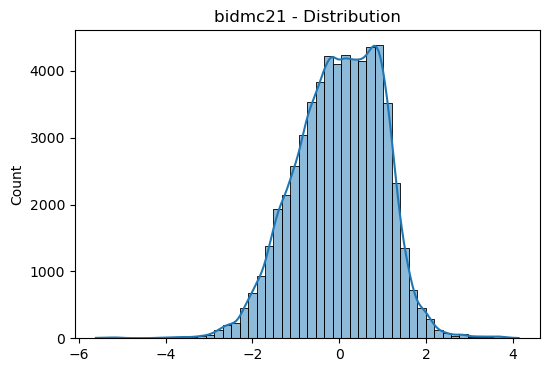


EDA for bidmc21n:
Min: -3.05, Max: 1.92, Mean: -0.00, Std: 1.00


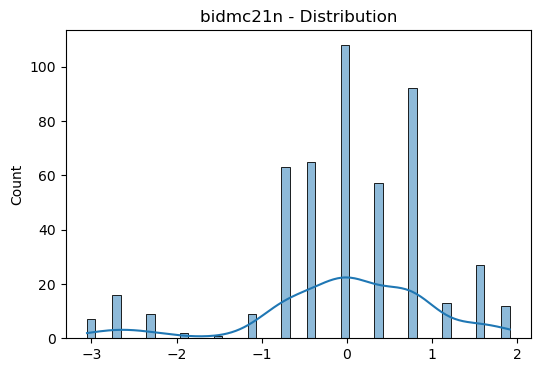


EDA for bidmc22:
Min: -3.50, Max: 2.91, Mean: -0.00, Std: 1.00


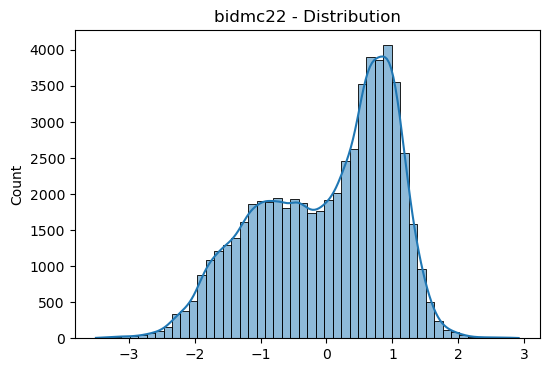


EDA for bidmc22n:
Min: -1.76, Max: 4.30, Mean: 0.00, Std: 1.00


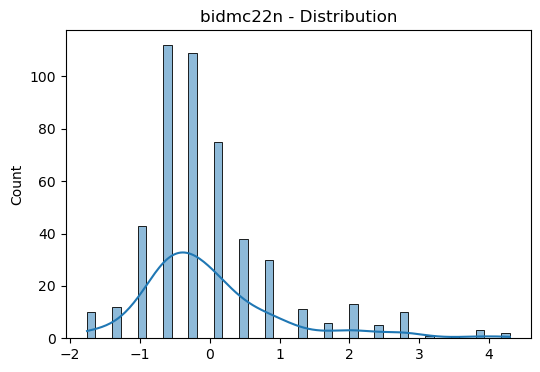


EDA for bidmc23:
Min: -3.52, Max: 3.54, Mean: 0.00, Std: 1.00


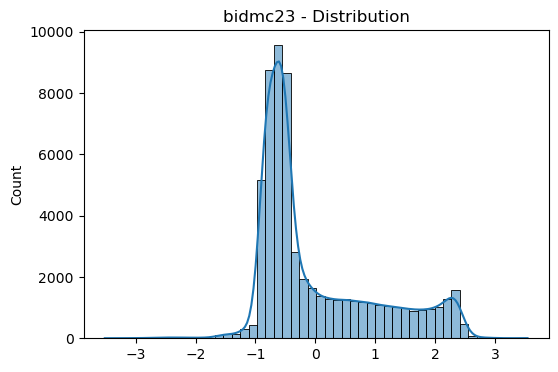


EDA for bidmc23n:
Min: -0.98, Max: 4.64, Mean: -0.00, Std: 1.00


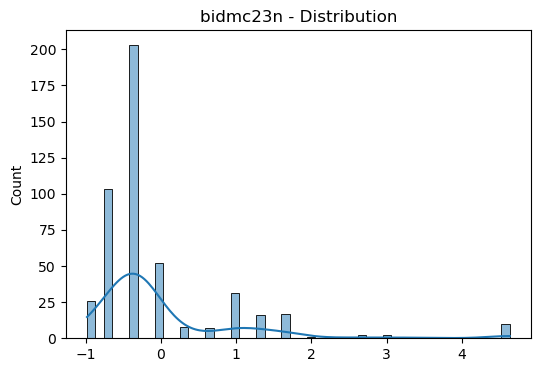


EDA for bidmc24:
Min: -1.25, Max: 3.68, Mean: -0.00, Std: 1.00


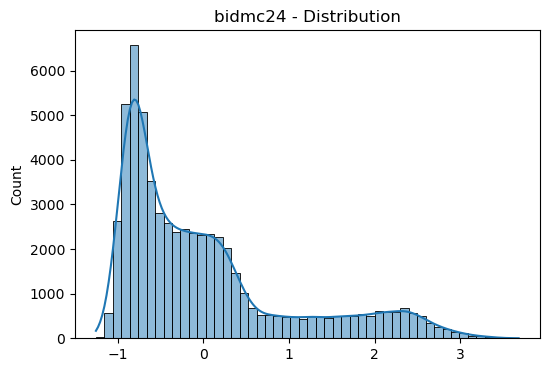


EDA for bidmc24n:
Min: -2.92, Max: 3.45, Mean: 0.00, Std: 1.00


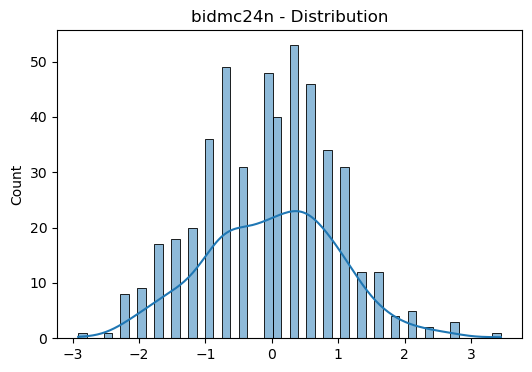


EDA for bidmc25:
Min: -6.96, Max: 6.79, Mean: -0.00, Std: 1.00


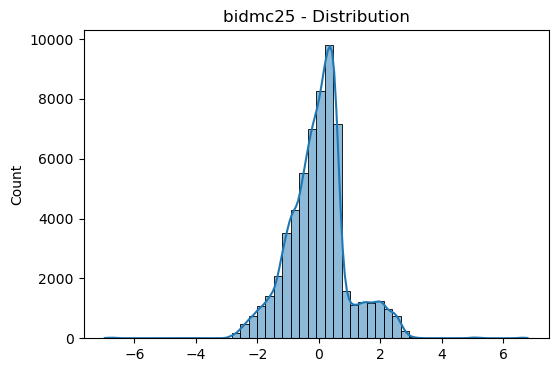


EDA for bidmc25n:
Min: -6.10, Max: 4.67, Mean: 0.00, Std: 1.00


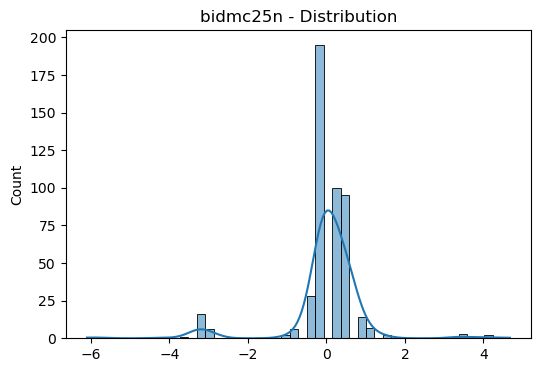


EDA for bidmc26:
Min: -5.03, Max: 3.73, Mean: -0.00, Std: 1.00


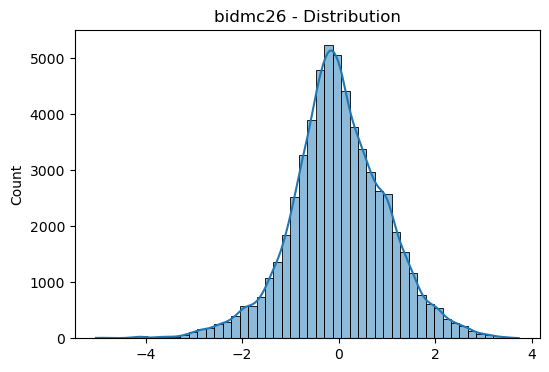


EDA for bidmc26n:
Min: -2.49, Max: 3.20, Mean: -0.00, Std: 1.00


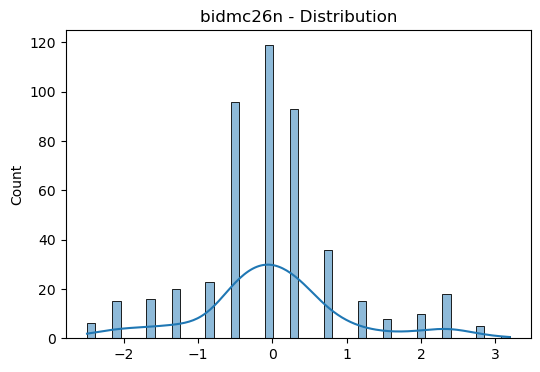


EDA for bidmc27:
Min: -18.54, Max: 15.08, Mean: -0.00, Std: 1.00


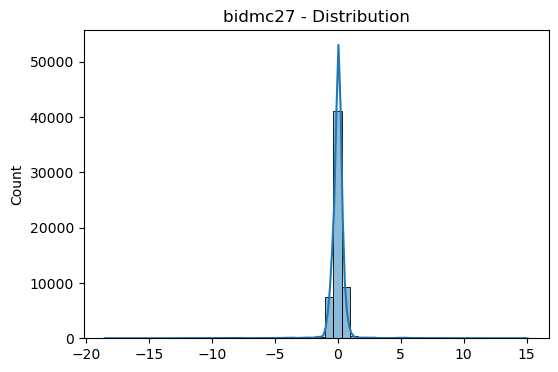


EDA for bidmc27n:
Min: -10.74, Max: 1.66, Mean: -0.00, Std: 1.00


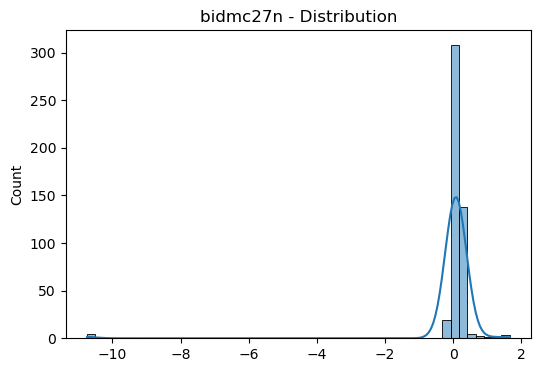


EDA for bidmc28:
Min: -3.30, Max: 3.40, Mean: -0.00, Std: 1.00


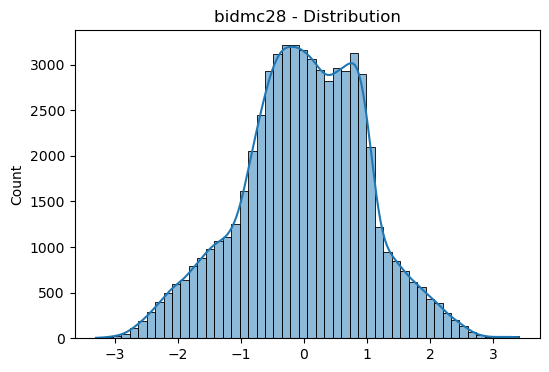


EDA for bidmc28n:
Min: -1.87, Max: 5.22, Mean: 0.00, Std: 1.00


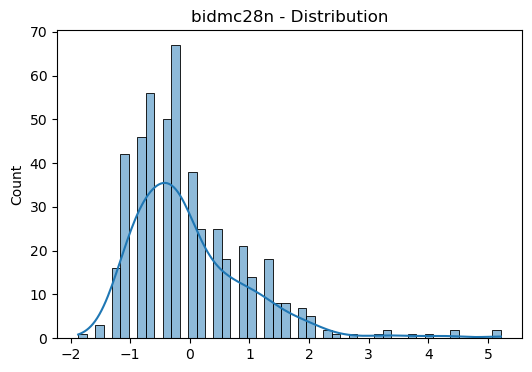


EDA for bidmc29:
Min: -7.86, Max: 7.05, Mean: 0.00, Std: 1.00


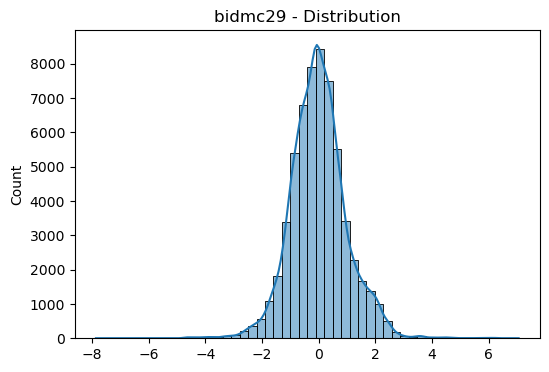


EDA for bidmc29n:
Min: -3.39, Max: 4.27, Mean: -0.00, Std: 1.00


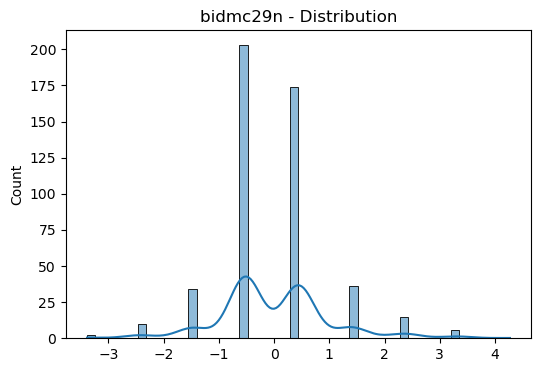


EDA for bidmc30:
Min: -3.80, Max: 4.27, Mean: 0.00, Std: 1.00


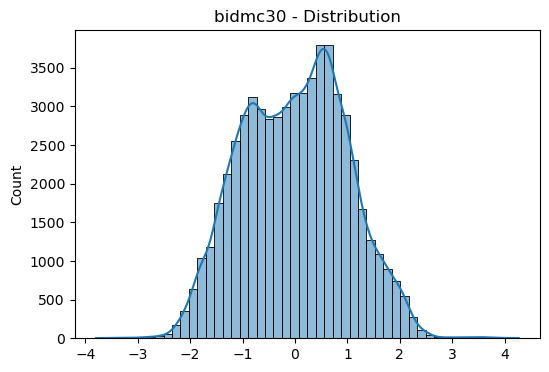


EDA for bidmc30n:
Min: -3.81, Max: 3.93, Mean: 0.00, Std: 1.00


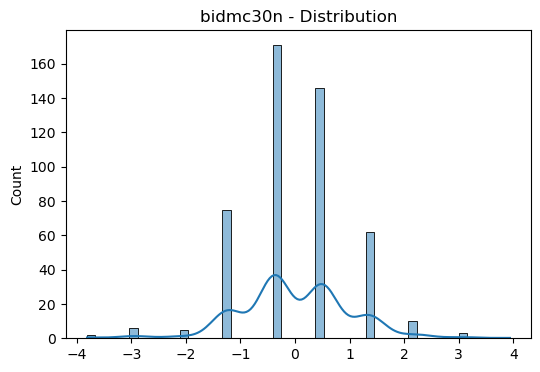


EDA for bidmc31:
Min: -4.09, Max: 2.82, Mean: -0.00, Std: 1.00


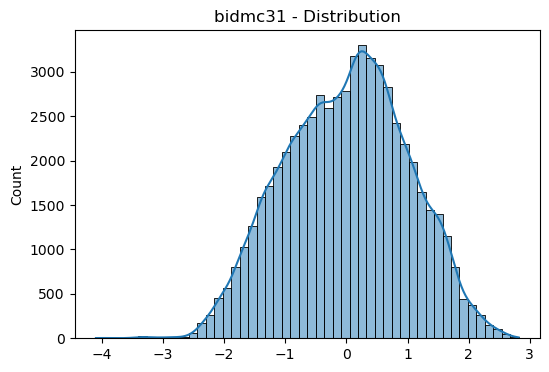


EDA for bidmc31n:
Min: -1.66, Max: 3.49, Mean: -0.00, Std: 1.00


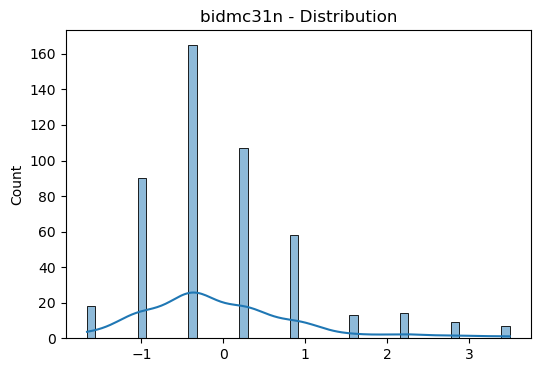


EDA for bidmc32:
Min: -2.64, Max: 2.47, Mean: 0.00, Std: 1.00


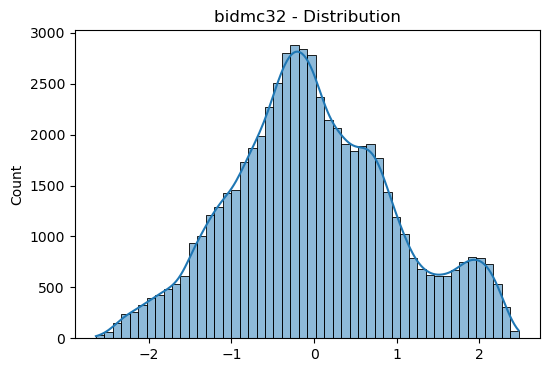


EDA for bidmc32n:
Min: -3.41, Max: 6.19, Mean: -0.00, Std: 1.00


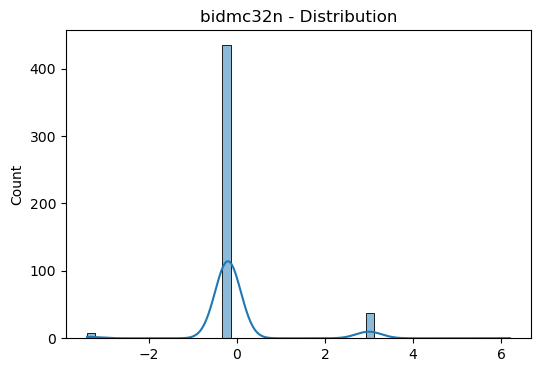


EDA for bidmc33:
Min: -3.18, Max: 3.98, Mean: -0.00, Std: 1.00


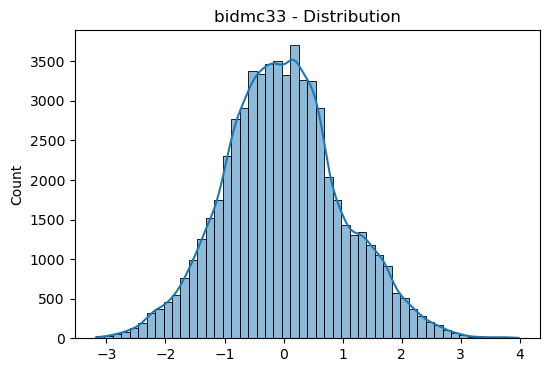


EDA for bidmc33n:
Min: -2.99, Max: 2.11, Mean: -0.00, Std: 1.00


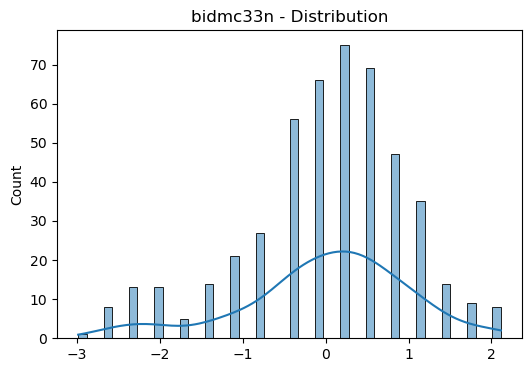


EDA for bidmc34:
Min: -8.24, Max: 9.38, Mean: 0.00, Std: 1.00


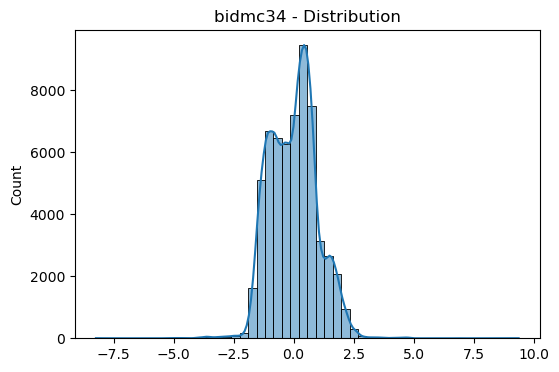


EDA for bidmc34n:
Min: -1.58, Max: 6.97, Mean: -0.00, Std: 1.00


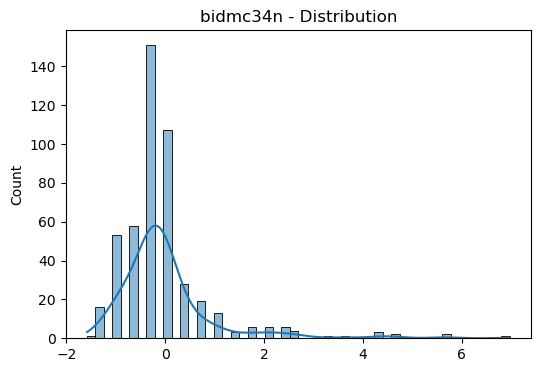


EDA for bidmc35:
Min: -3.67, Max: 3.40, Mean: -0.00, Std: 1.00


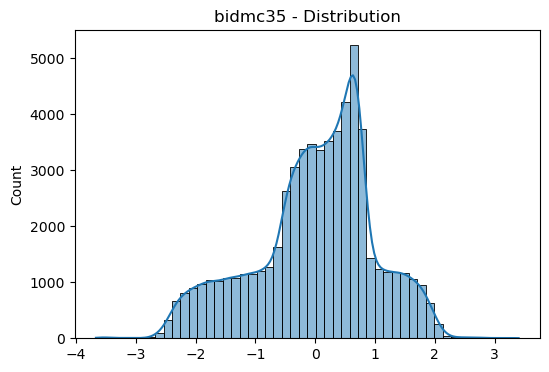


EDA for bidmc35n:
Min: -2.15, Max: 2.72, Mean: -0.00, Std: 1.00


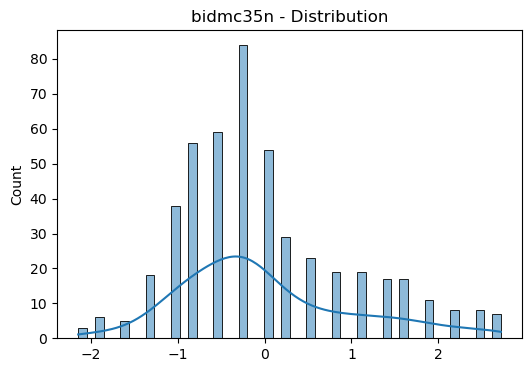


EDA for bidmc36:
Min: -4.19, Max: 7.80, Mean: 0.00, Std: 1.00


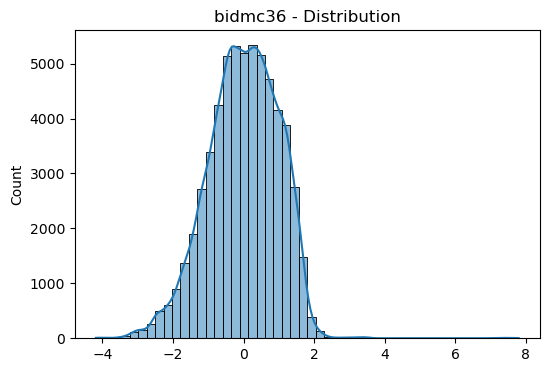


EDA for bidmc36n:
Min: -2.71, Max: 2.09, Mean: 0.00, Std: 1.00


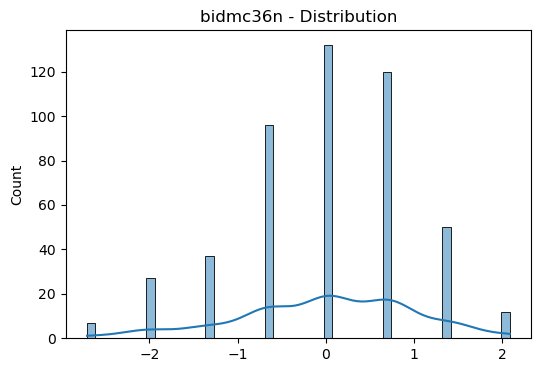


EDA for bidmc37:
Min: -5.13, Max: 8.12, Mean: -0.00, Std: 1.00


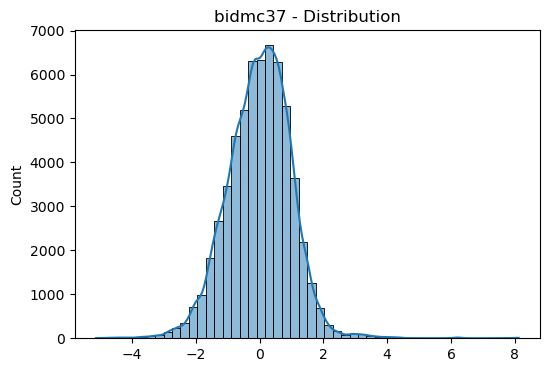


EDA for bidmc37n:
Min: -1.56, Max: 2.72, Mean: 0.00, Std: 1.00


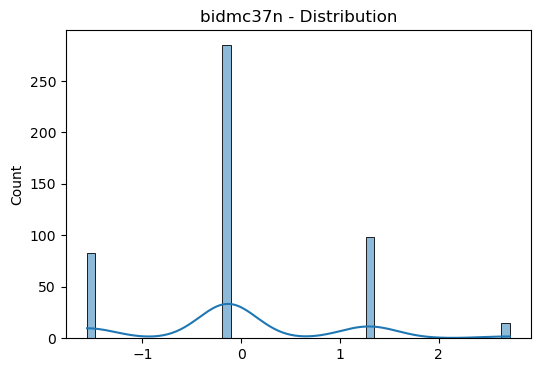


EDA for bidmc38:
Min: -5.39, Max: 4.90, Mean: -0.00, Std: 1.00


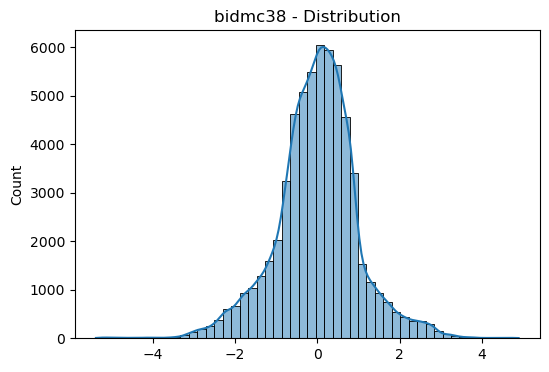


EDA for bidmc38n:
Min: -1.74, Max: 2.74, Mean: -0.00, Std: 1.00


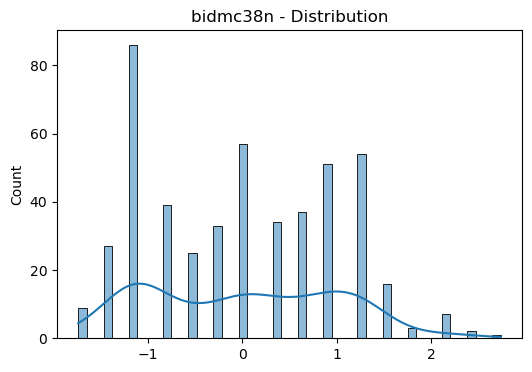


EDA for bidmc39:
Min: -2.85, Max: 8.34, Mean: -0.00, Std: 1.00


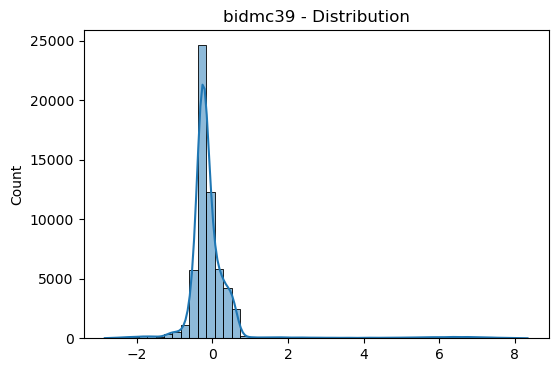


EDA for bidmc39n:
Min: -2.16, Max: 3.58, Mean: -0.00, Std: 1.00


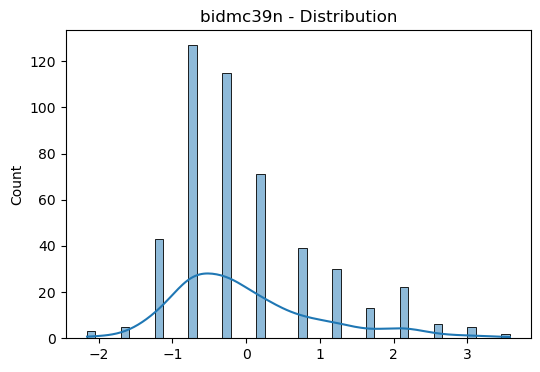


EDA for bidmc40:
Min: -4.93, Max: 6.06, Mean: -0.00, Std: 1.00


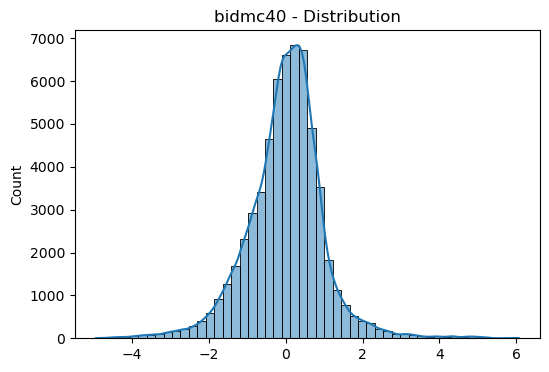


EDA for bidmc40n:
Min: -1.68, Max: 1.83, Mean: -0.00, Std: 1.00


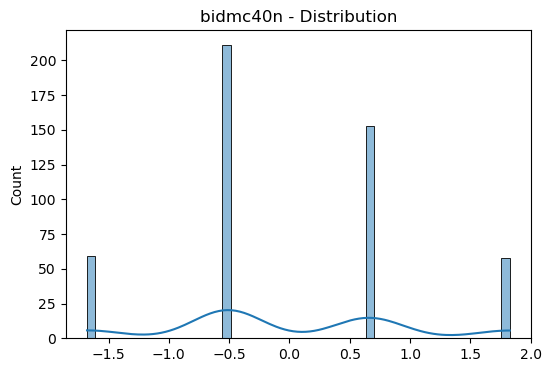


EDA for bidmc41:
Min: -4.30, Max: 5.42, Mean: -0.00, Std: 1.00


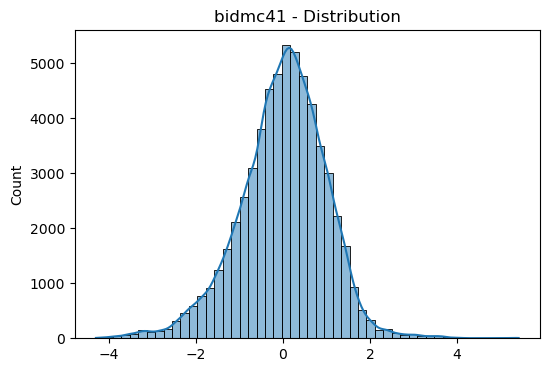


EDA for bidmc41n:
Min: -3.40, Max: 2.31, Mean: 0.00, Std: 1.00


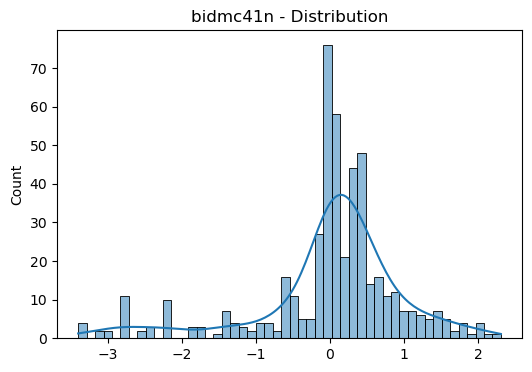


EDA for bidmc42:
Min: -7.39, Max: 5.08, Mean: 0.00, Std: 1.00


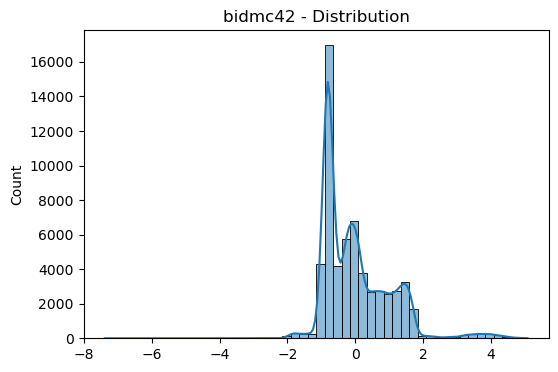


EDA for bidmc42n:
Min: -3.03, Max: 2.26, Mean: -0.00, Std: 1.00


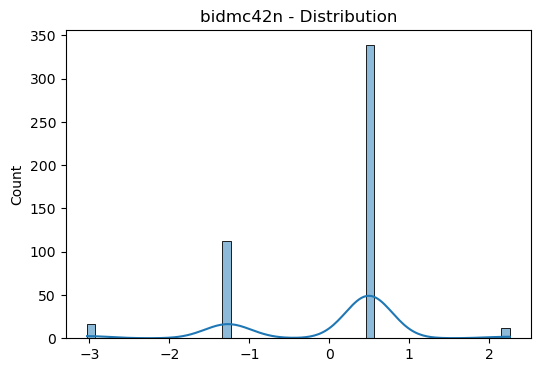


EDA for bidmc43:
Min: -3.82, Max: 4.11, Mean: 0.00, Std: 1.00


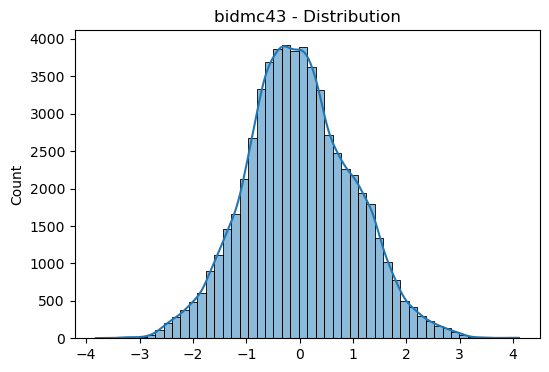


EDA for bidmc43n:
Min: -2.93, Max: 2.43, Mean: 0.00, Std: 1.00


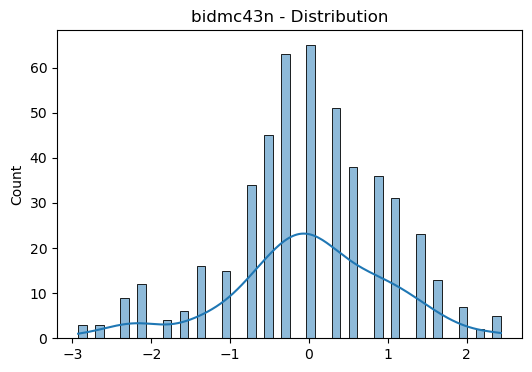


EDA for bidmc44:
Min: -3.86, Max: 6.32, Mean: 0.00, Std: 1.00


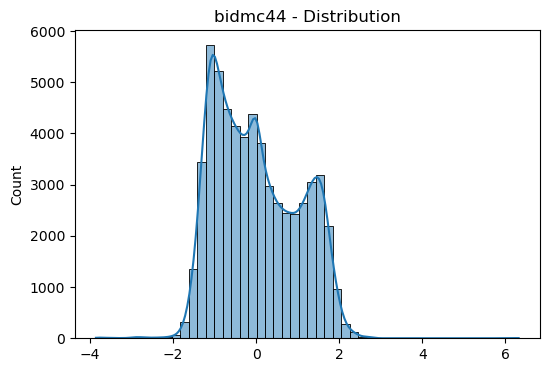


EDA for bidmc44n:
Min: -1.78, Max: 1.37, Mean: 0.00, Std: 1.00


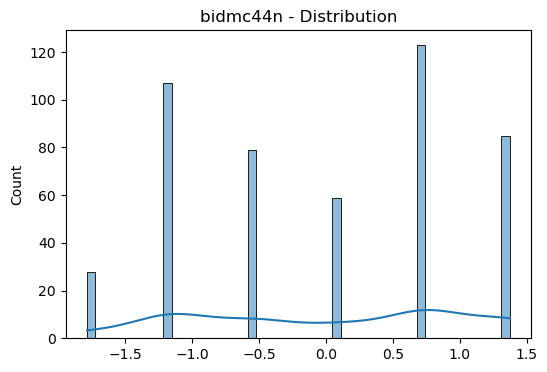


EDA for bidmc45:
Min: -2.74, Max: 2.97, Mean: 0.00, Std: 1.00


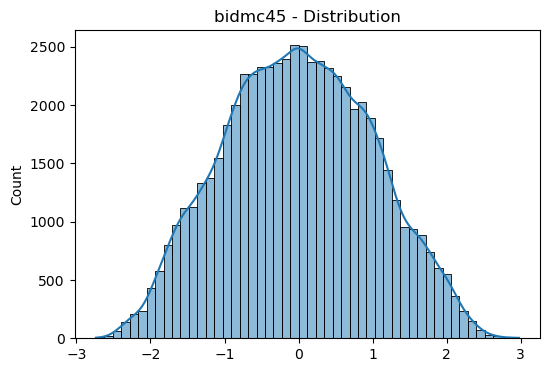


EDA for bidmc45n:
Min: -3.59, Max: 2.24, Mean: -0.00, Std: 1.00


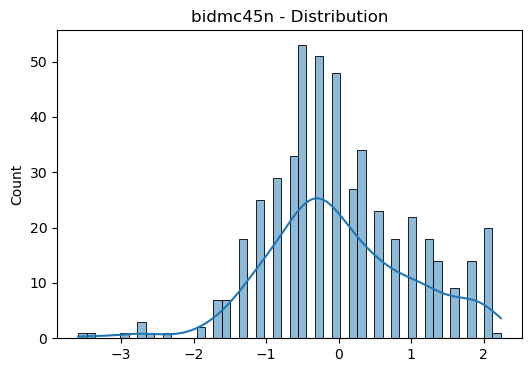


EDA for bidmc46:
Min: -3.33, Max: 3.36, Mean: 0.00, Std: 1.00


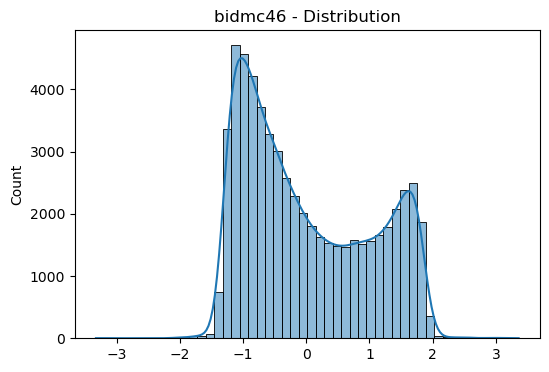


EDA for bidmc46n:
Min: -2.67, Max: 3.81, Mean: -0.00, Std: 1.00


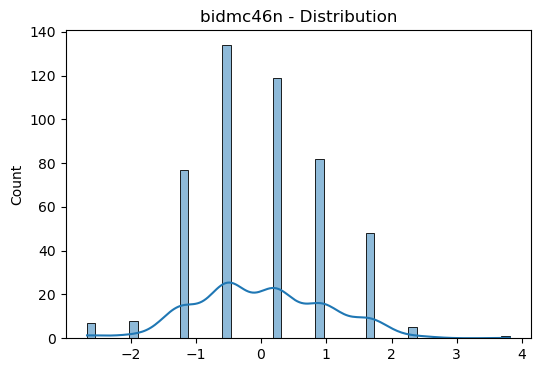


EDA for bidmc47:
Min: -4.26, Max: 4.85, Mean: 0.00, Std: 1.00


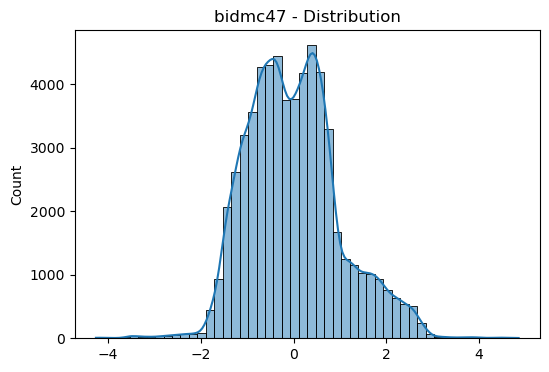


EDA for bidmc47n:
Min: -1.51, Max: 5.76, Mean: -0.00, Std: 1.00


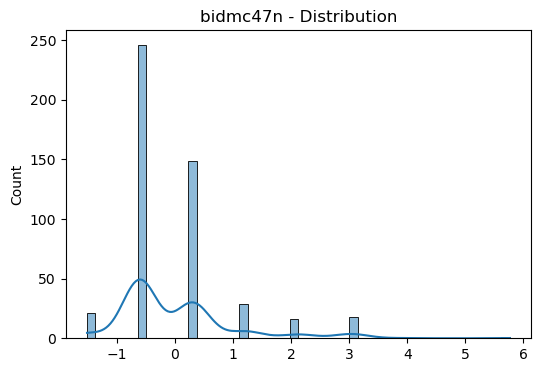


EDA for bidmc48:
Min: -7.50, Max: 9.00, Mean: 0.00, Std: 1.00


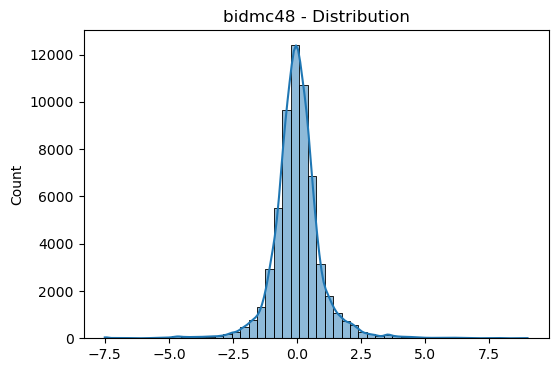


EDA for bidmc48n:
Min: -1.24, Max: 5.16, Mean: 0.00, Std: 1.00


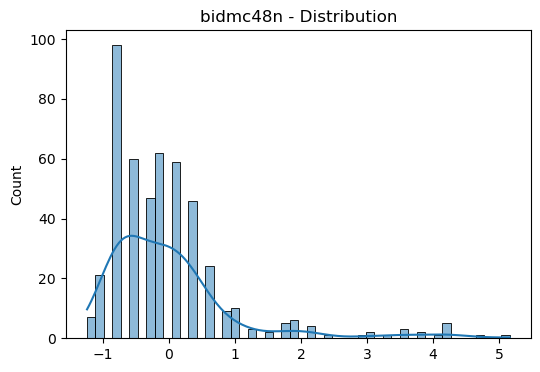


EDA for bidmc49:
Min: -4.83, Max: 8.83, Mean: -0.00, Std: 1.00


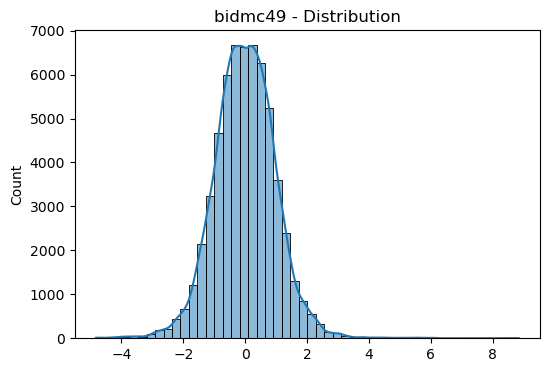


EDA for bidmc49n:
Min: -2.22, Max: 2.21, Mean: -0.00, Std: 1.00


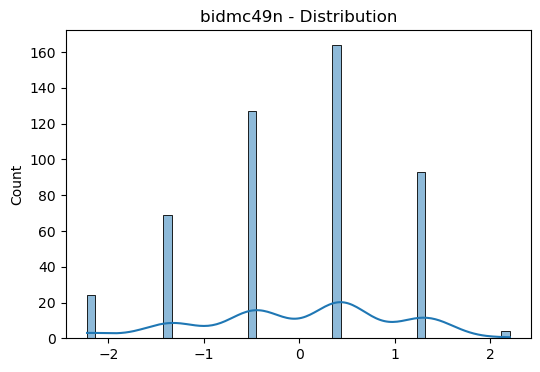


EDA for bidmc50:
Min: -6.18, Max: 5.45, Mean: -0.00, Std: 1.00


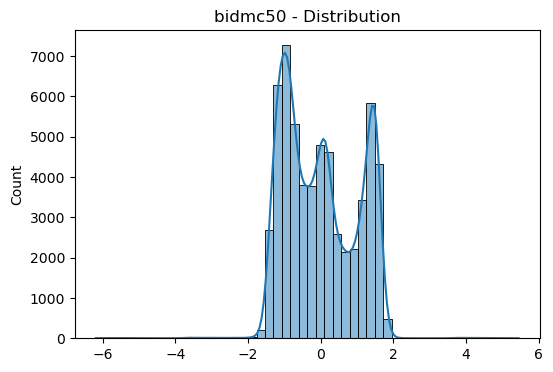


EDA for bidmc50n:
Min: -1.38, Max: 2.81, Mean: -0.00, Std: 1.00


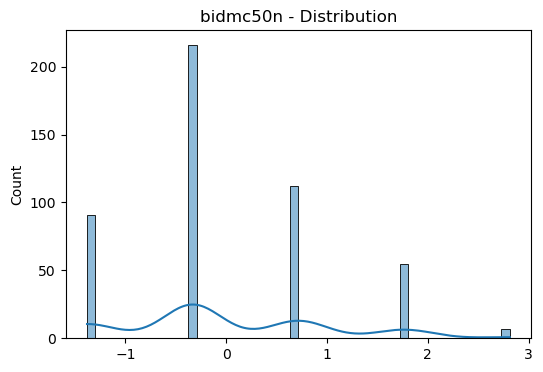


EDA for bidmc51:
Min: -2.49, Max: 3.11, Mean: 0.00, Std: 1.00


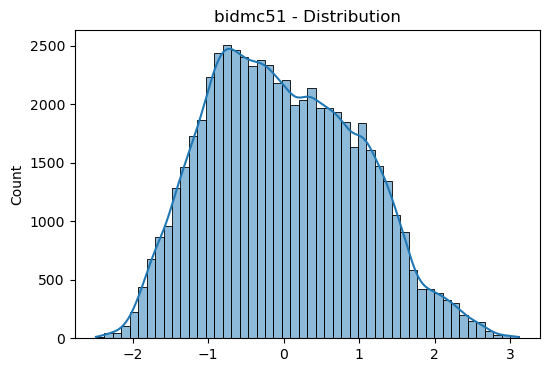


EDA for bidmc51n:
Min: -1.99, Max: 1.94, Mean: -0.00, Std: 1.00


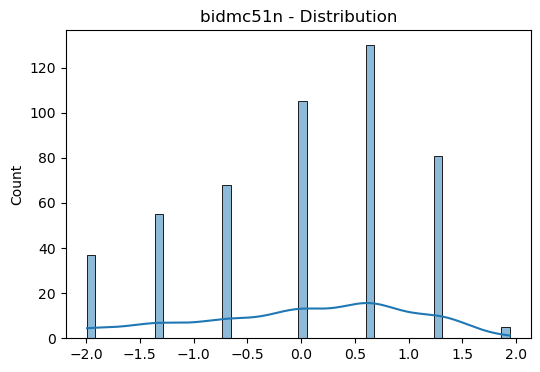


EDA for bidmc52:
Min: -3.23, Max: 2.96, Mean: 0.00, Std: 1.00


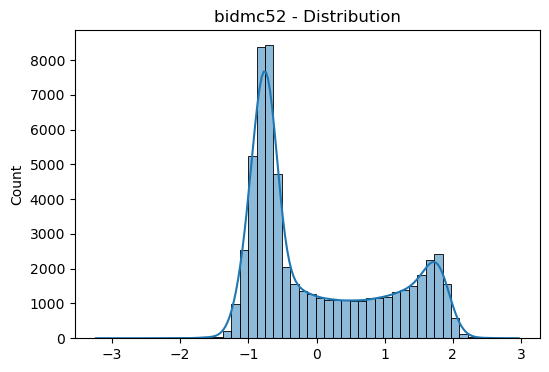


EDA for bidmc52n:
Min: -2.22, Max: 2.01, Mean: -0.00, Std: 1.00


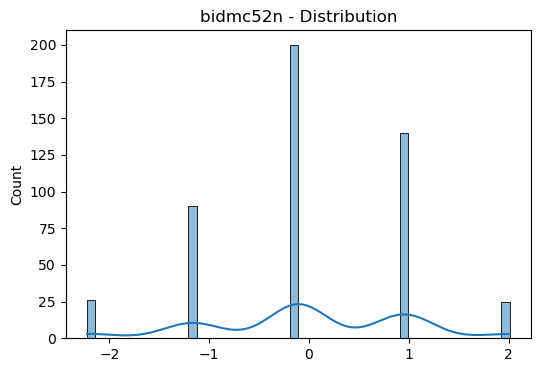


EDA for bidmc53:
Min: -6.42, Max: 8.72, Mean: 0.00, Std: 1.00


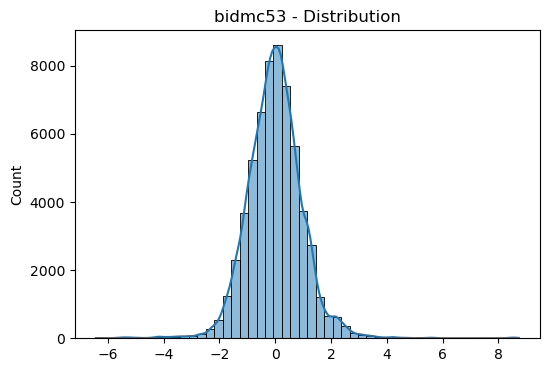


EDA for bidmc53n:
Min: -2.36, Max: 2.63, Mean: 0.00, Std: 1.00


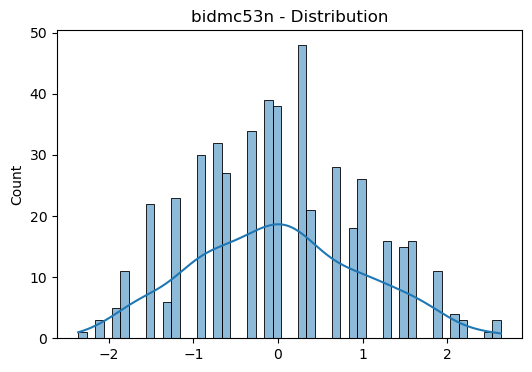

In [ ]:
# -----------------------------
# Exploratory Data Analysis (EDA)
-----------------------------
for patient, signal in patient_signals.items():
    print(f'\nEDA for {patient}:')
    print(f'Min: {np.min(signal):.2f}, Max: {np.max(signal):.2f}, Mean: {np.mean(signal):.2f}, Std: {np.std(signal):.2f}')
    
    #Plot time series
    plt.figure(figsize=(12,4))
    plt.plot(signal, label='Signal')
    plt.title(f'{patient} - Time Series')
    plt.xlabel('Time')
    plt.ylabel('Amplitude (normalized)')
    plt.legend()
    plt.show()

    # Histogram of values
    plt.figure(figsize=(6,4))
    sns.histplot(signal, bins=50, kde=True)
    plt.title(f'{patient} - Distribution')
    plt.show()

#Peaks detection example (simple visualization)
    peaks, _ = find_peaks(signal, distance=fs*0.5)  # peaks at least 0.5s apart
    plt.figure(figsize=(12,4))
    plt.plot(signal, label='Signal')
    plt.scatter(peaks, signal[peaks], color='red', label='Peaks')
    plt.title(f'{patient} - Peaks')
    plt.legend()
    plt.show()
    

In [6]:
# -----------------------------
# Prepare sliding windows for anomaly detection
# -----------------------------
X_windows = []
window_patient_map = []

for patient, signal in patient_signals.items():
    windows = sliding_windows(signal, window_size, window_step)
    X_windows.append(windows)
    window_patient_map.extend([patient]*len(windows))

X_windows = np.vstack(X_windows)  # shape: (total_windows, window_size)

In [7]:
# -----------------------------
# Train Isolation Forest
# -----------------------------
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(X_windows)

IsolationForest(contamination=0.01, random_state=42)

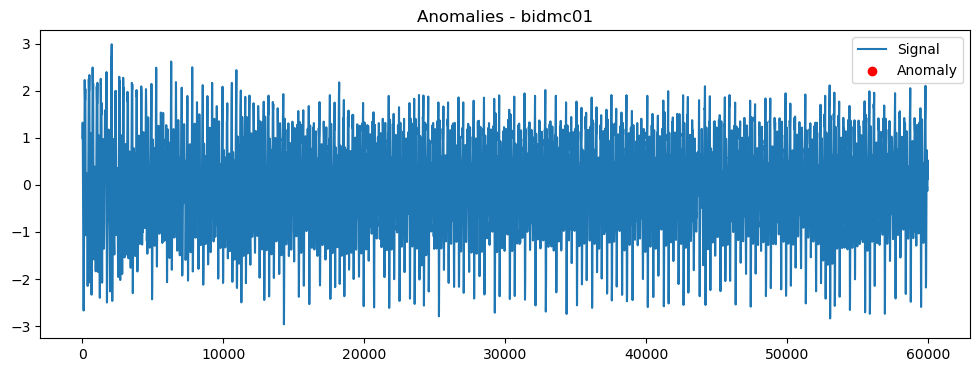

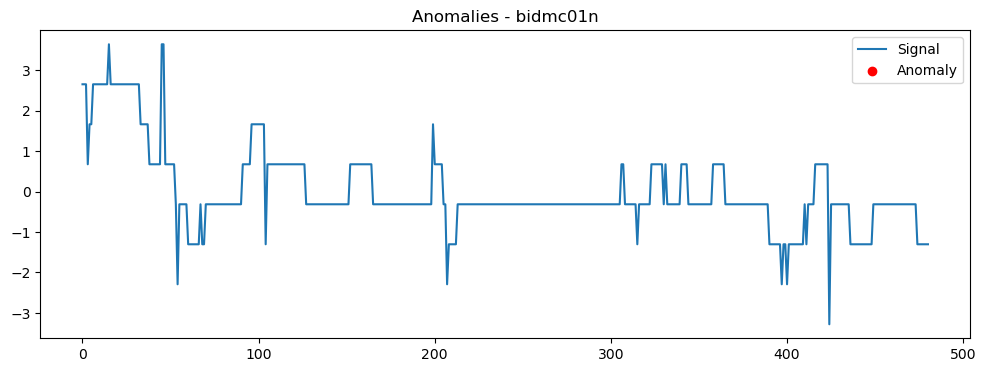

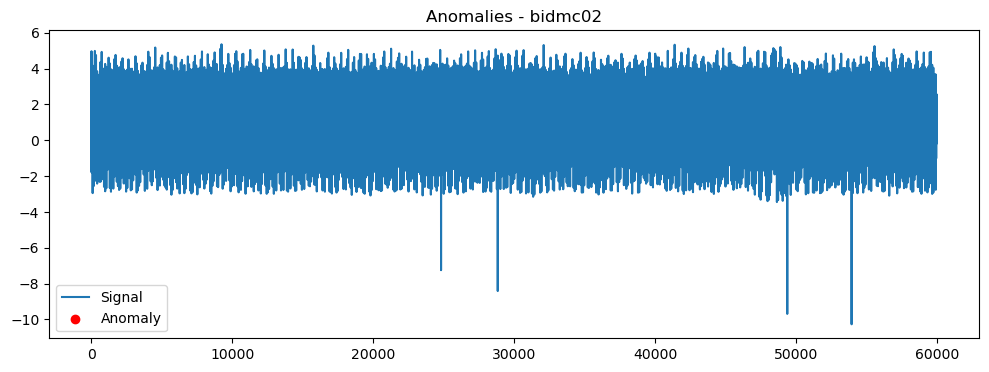

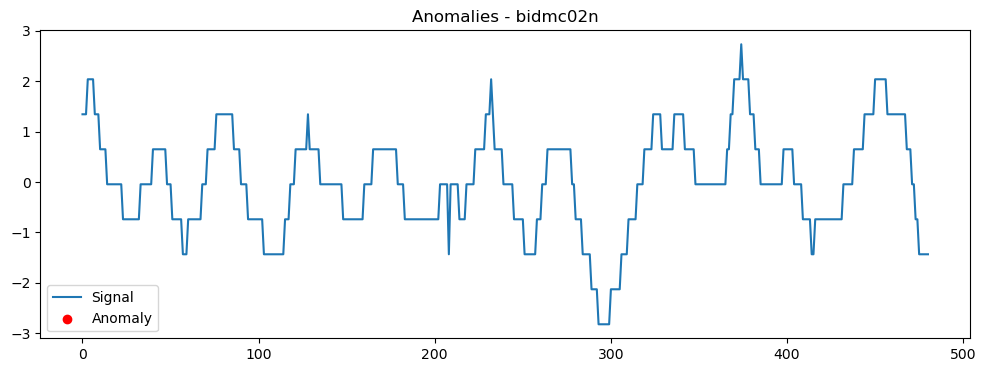

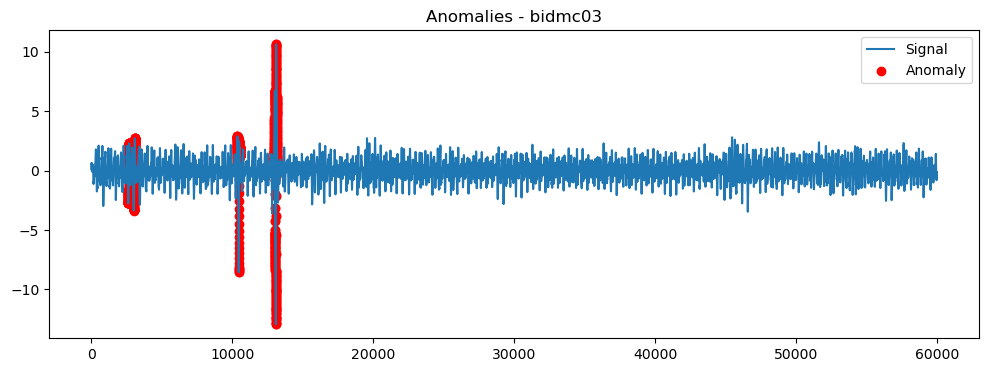

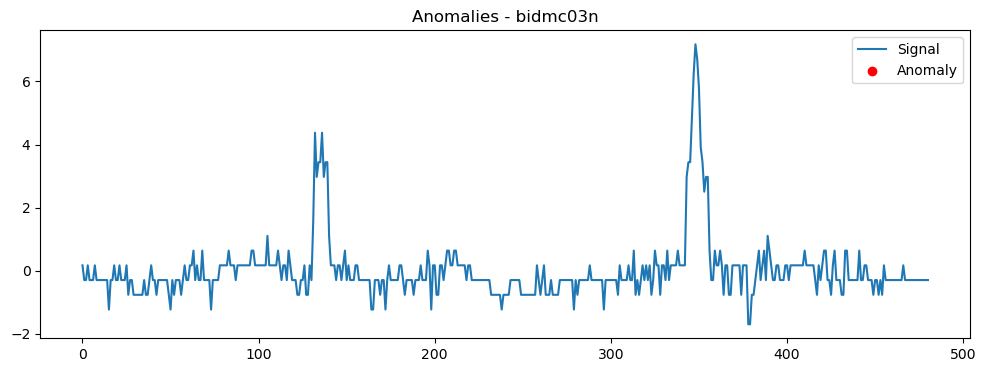

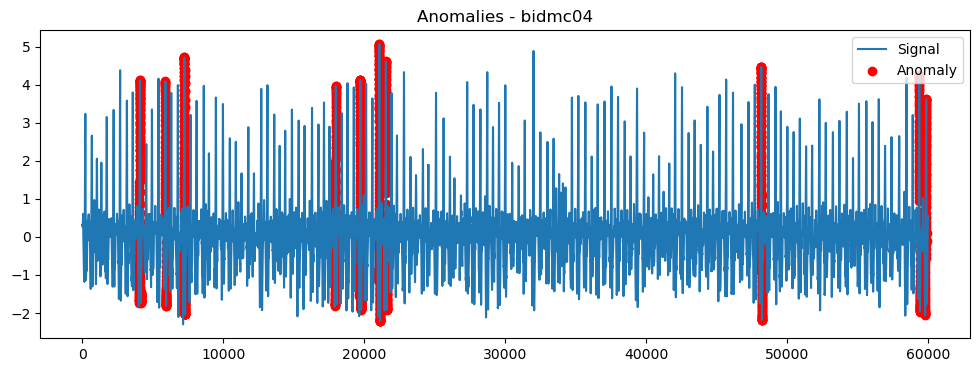

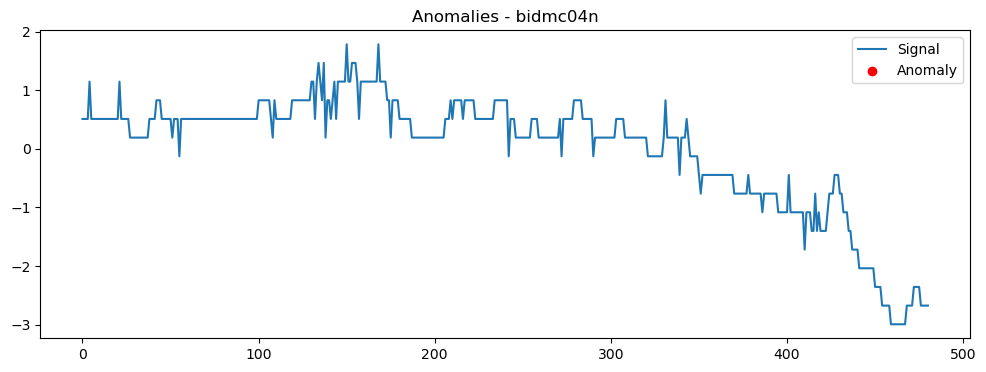

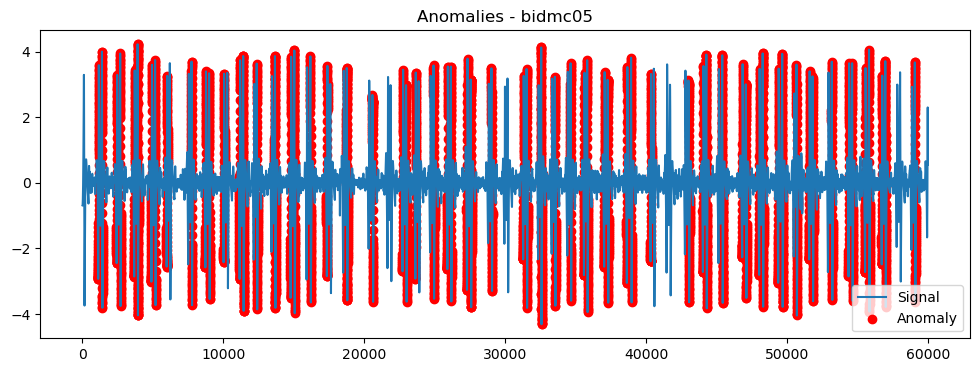

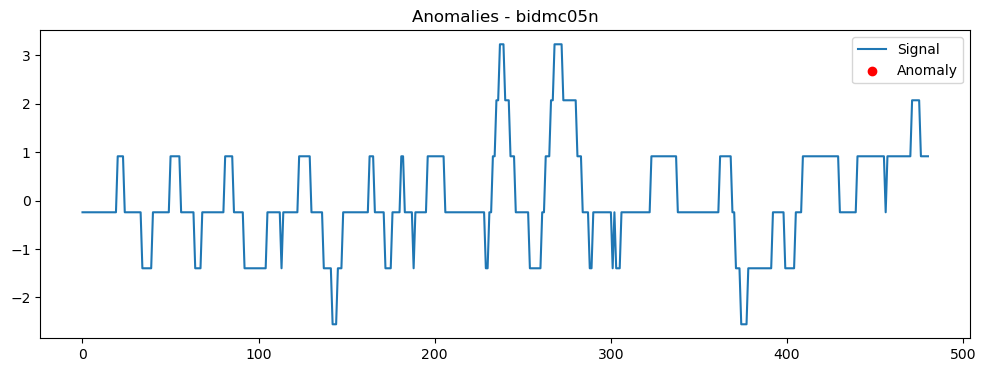

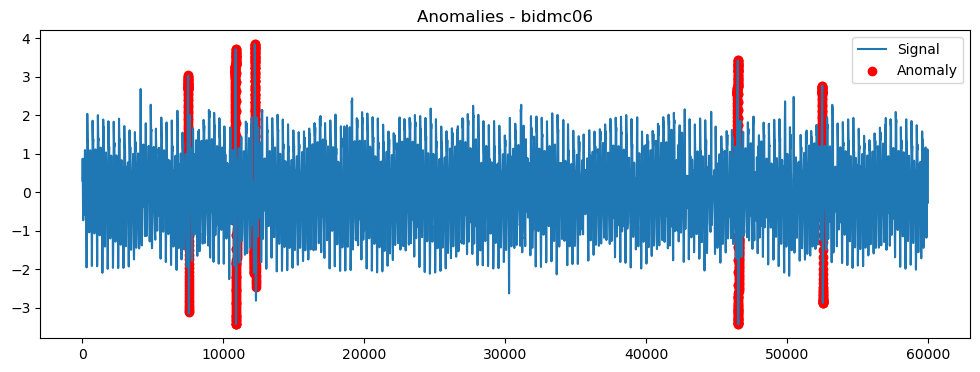

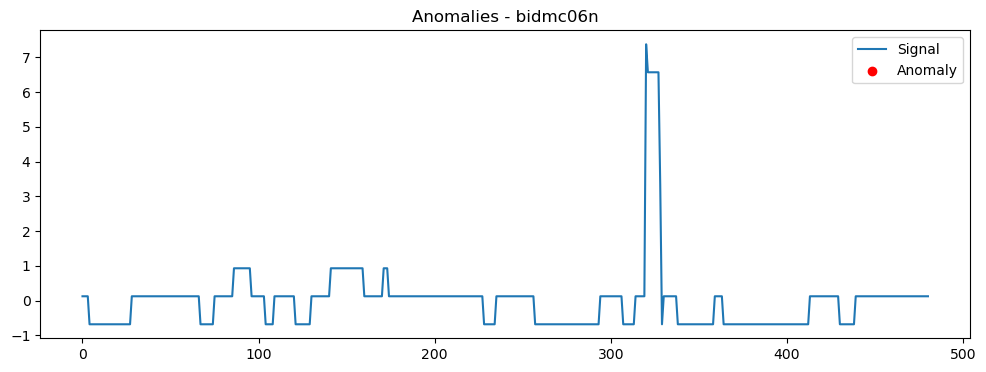

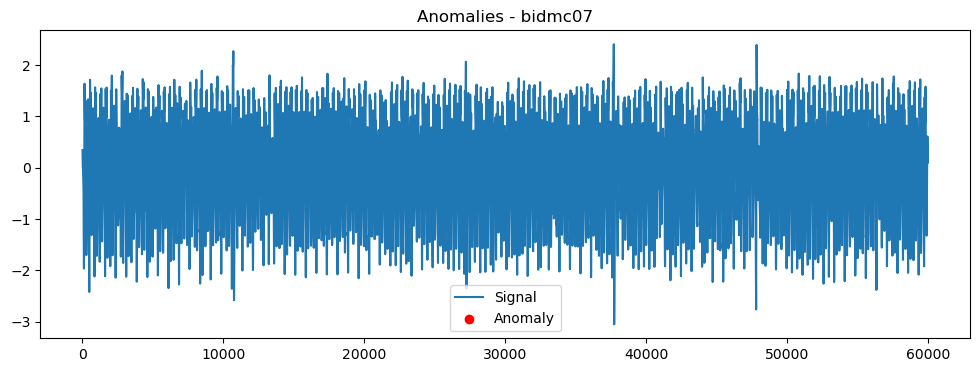

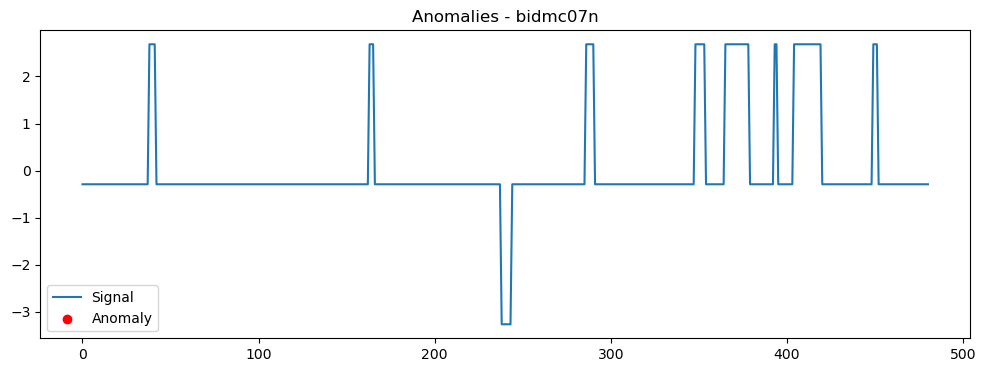

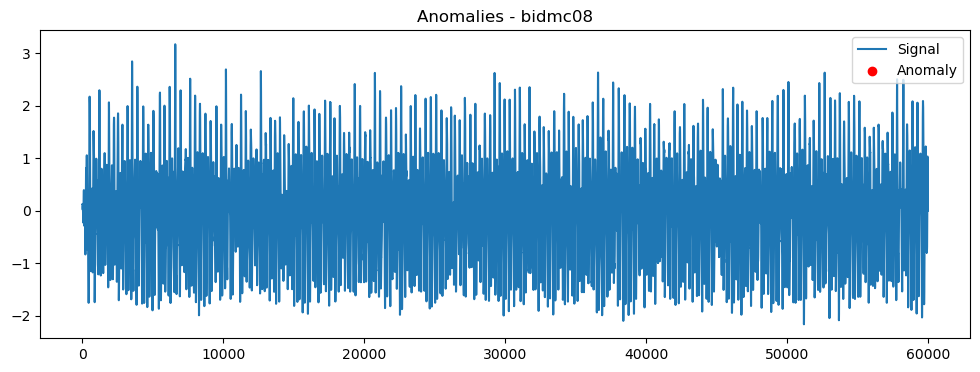

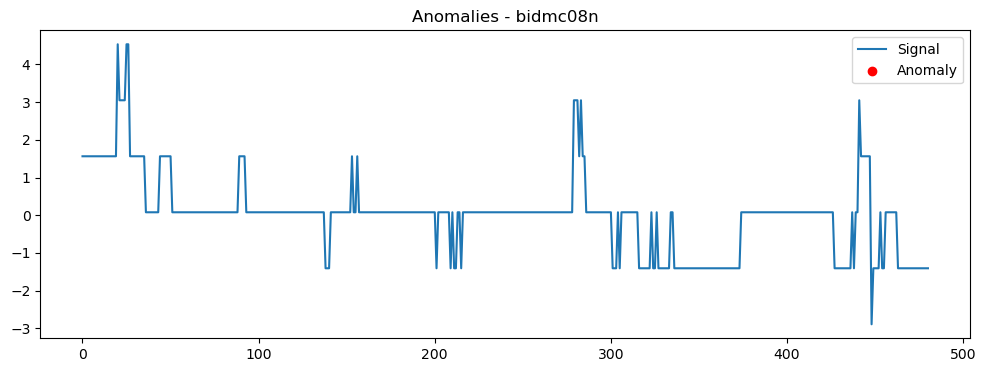

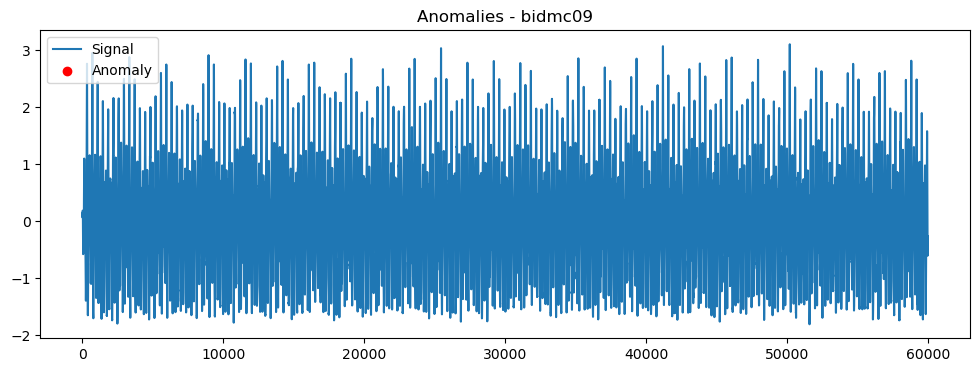

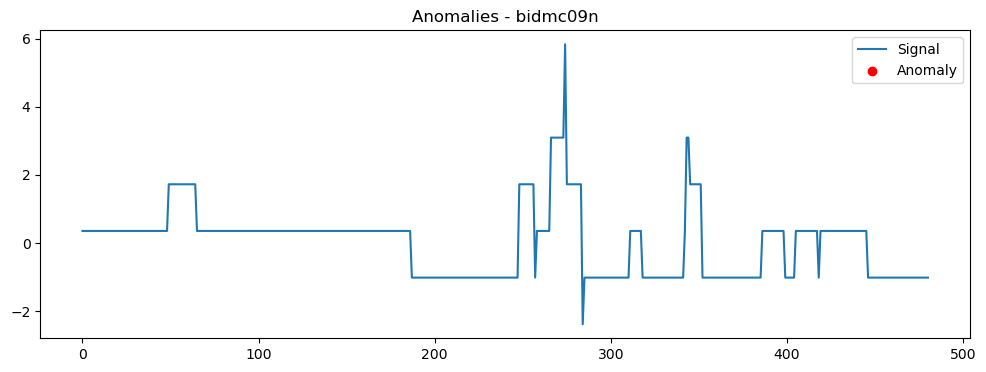

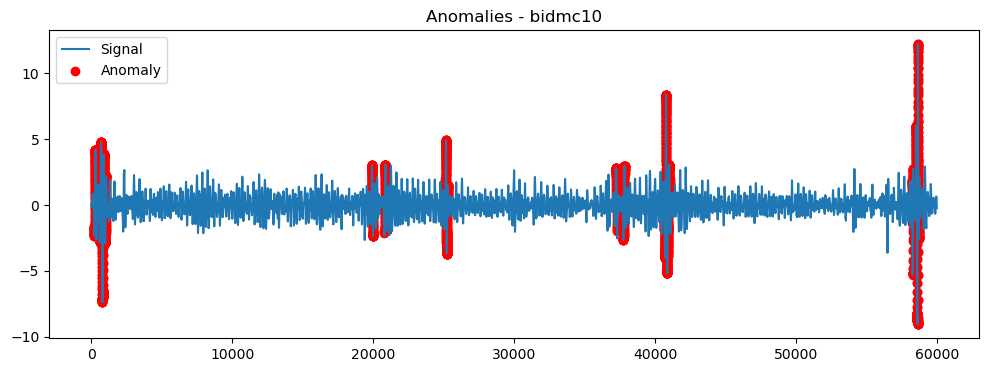

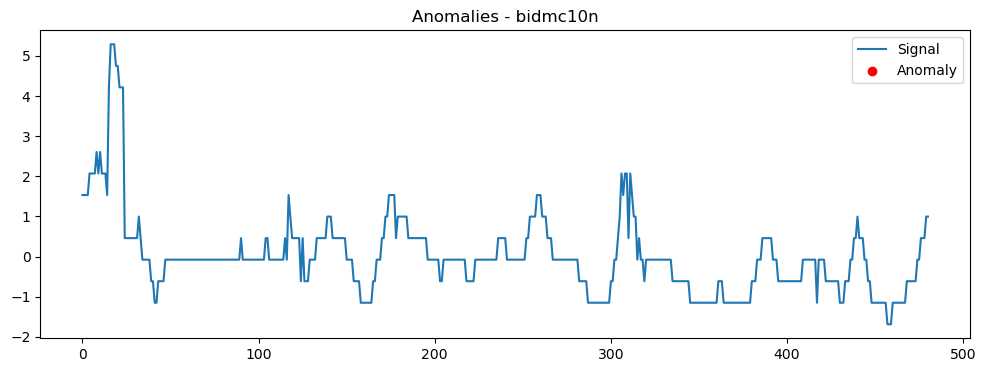

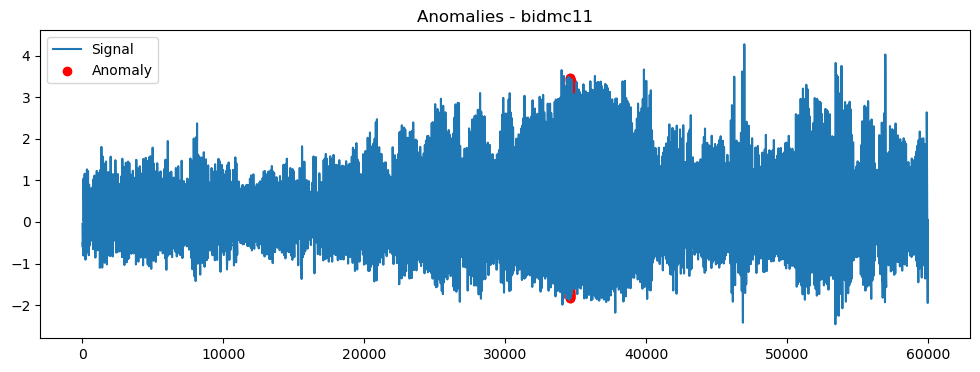

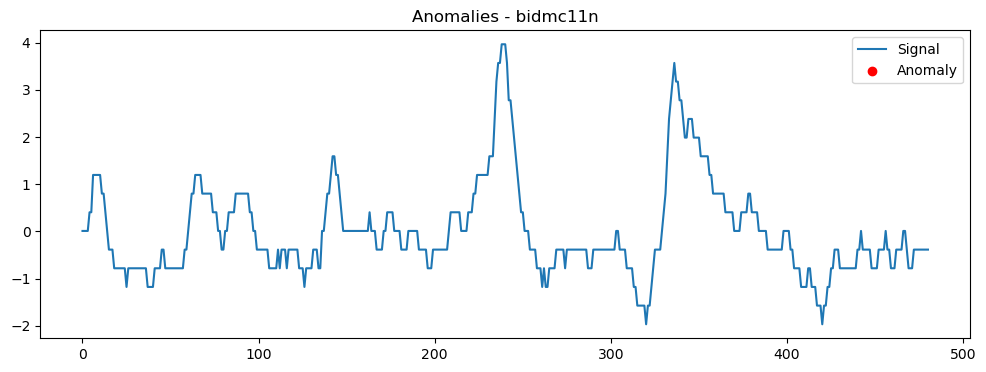

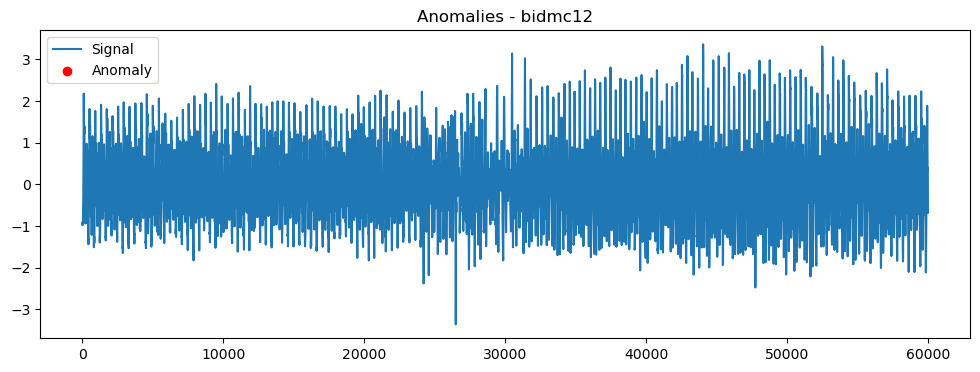

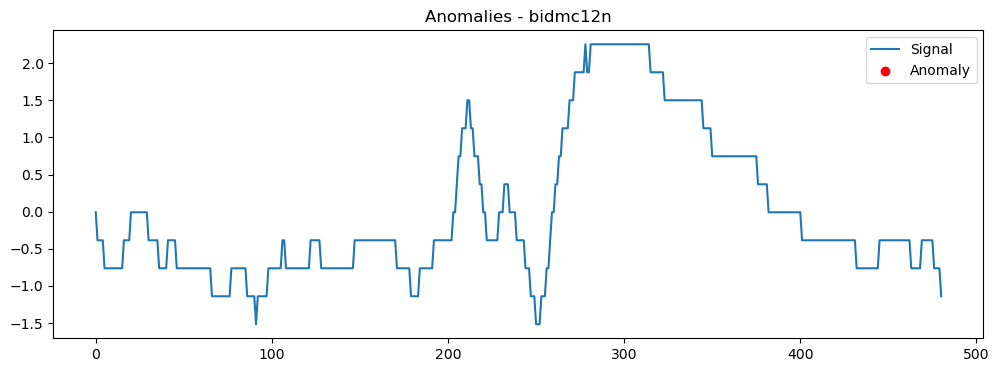

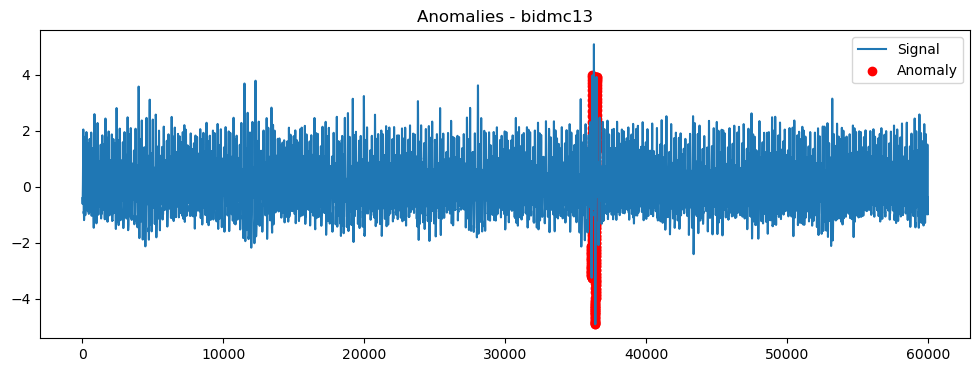

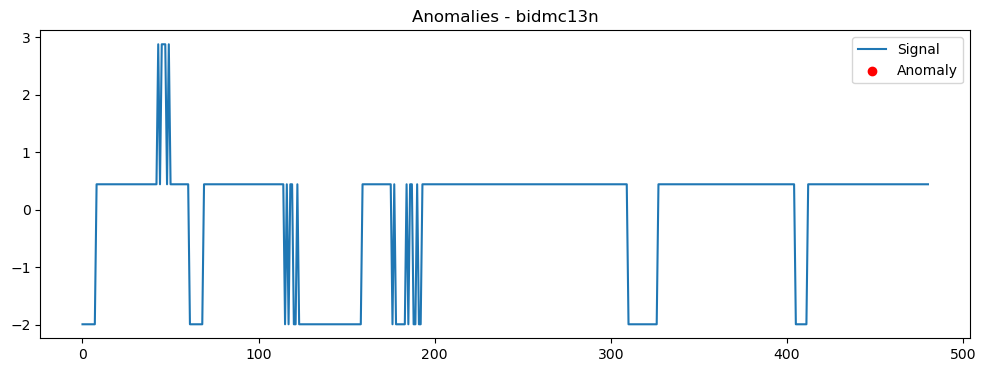

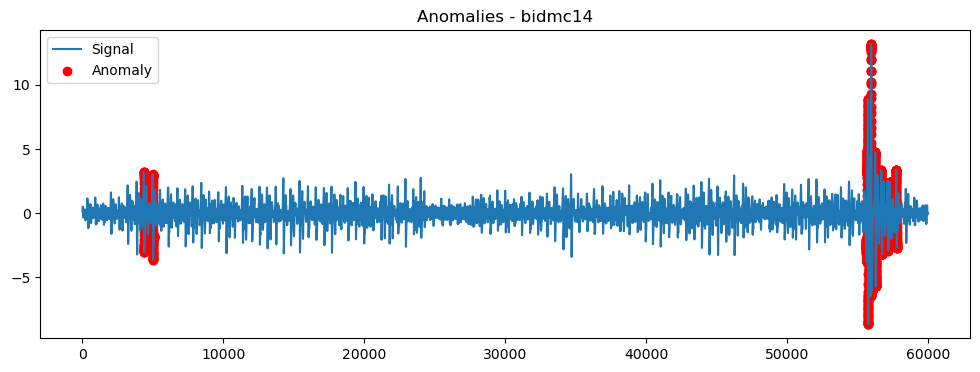

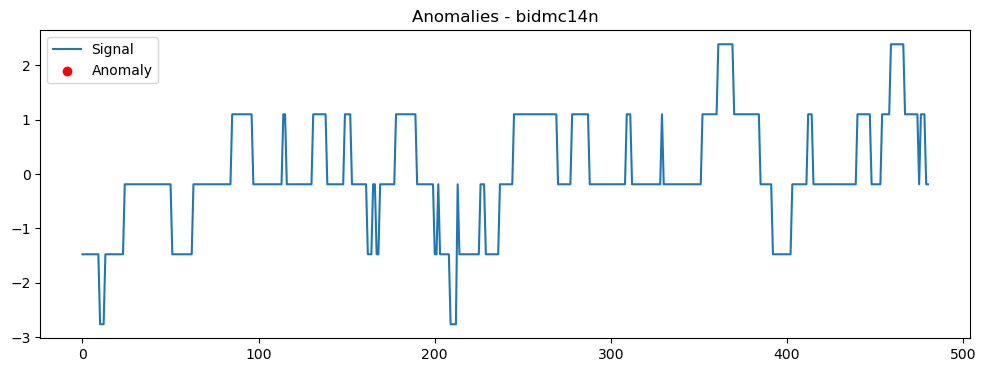

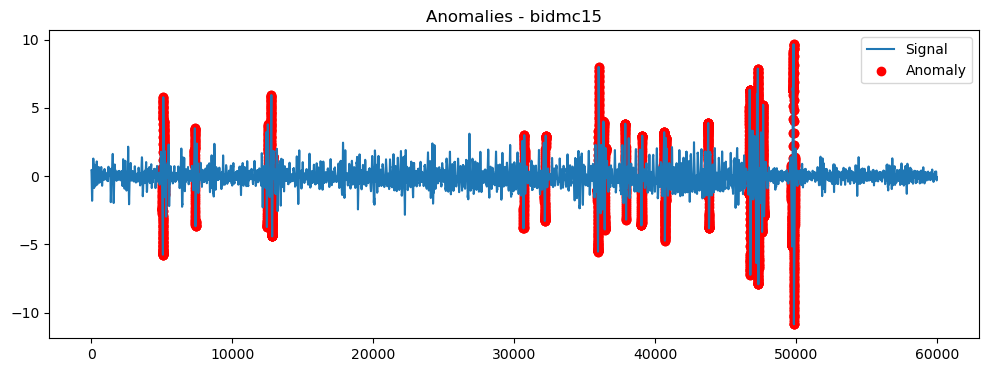

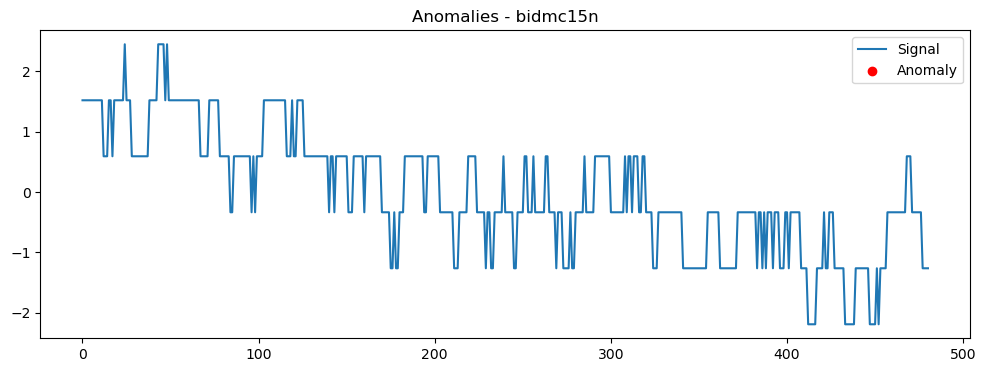

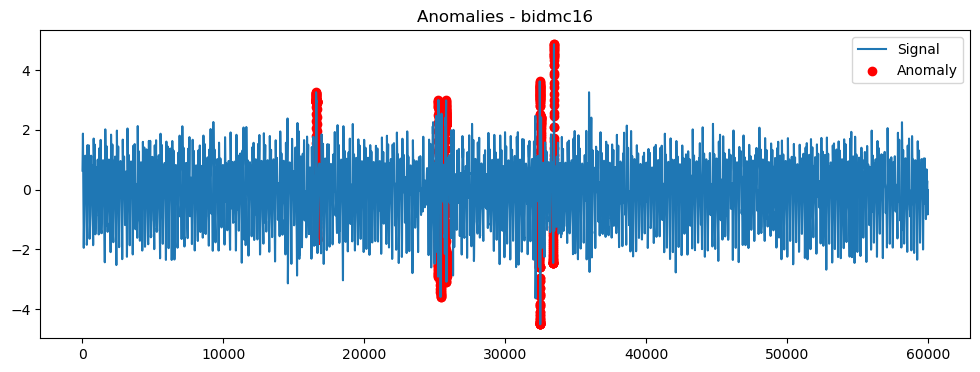

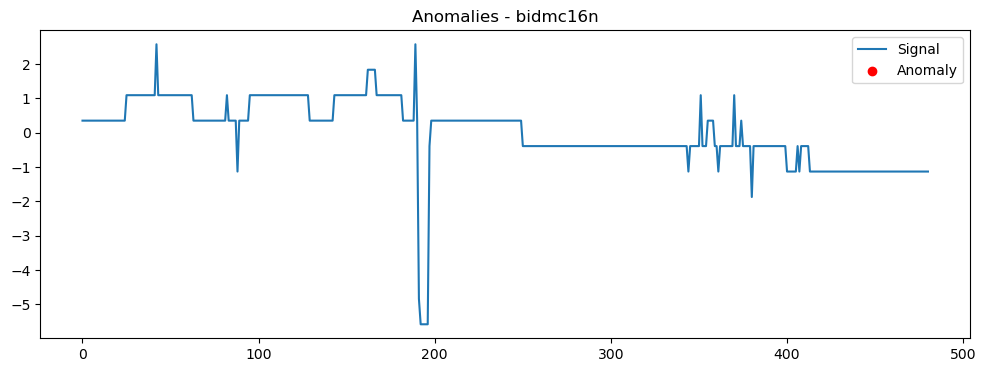

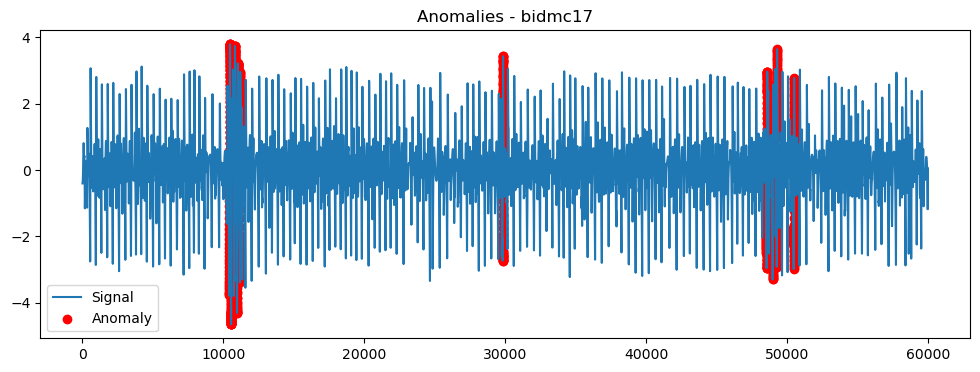

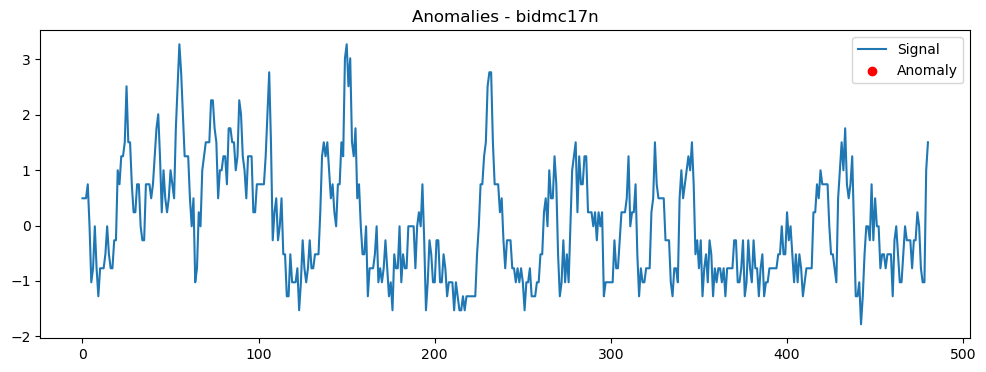

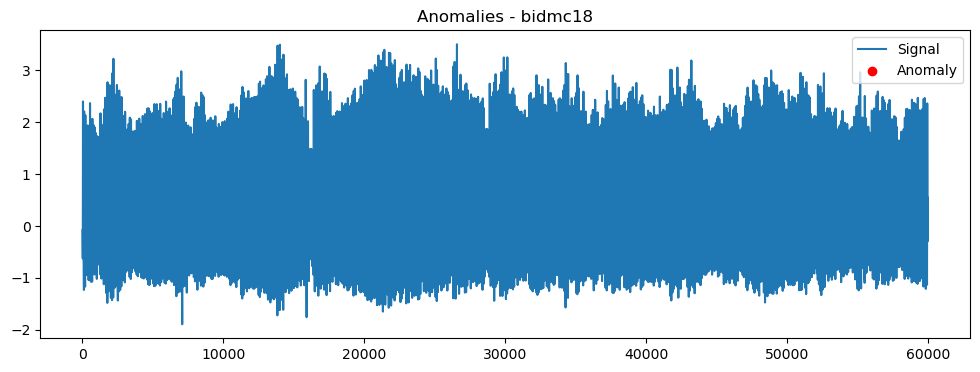

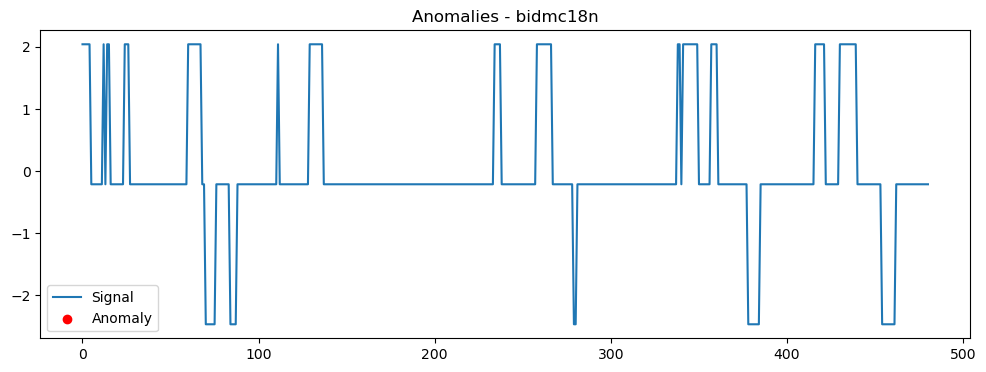

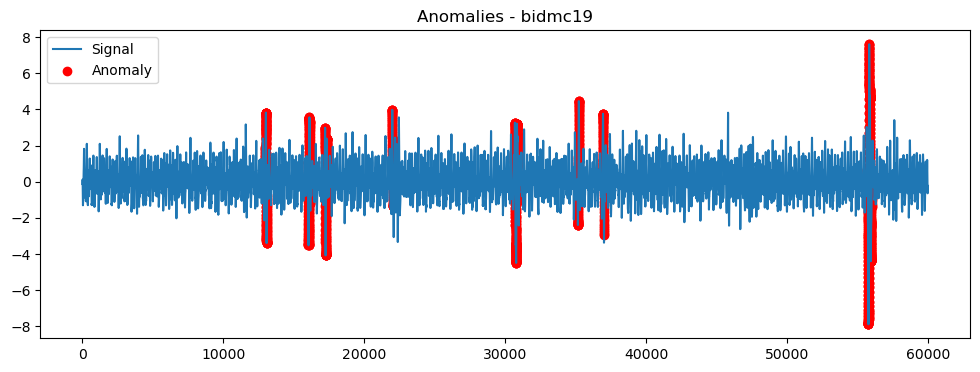

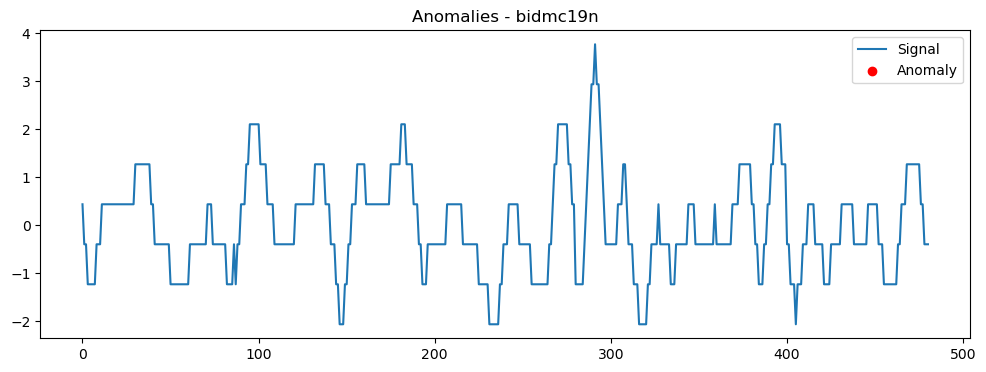

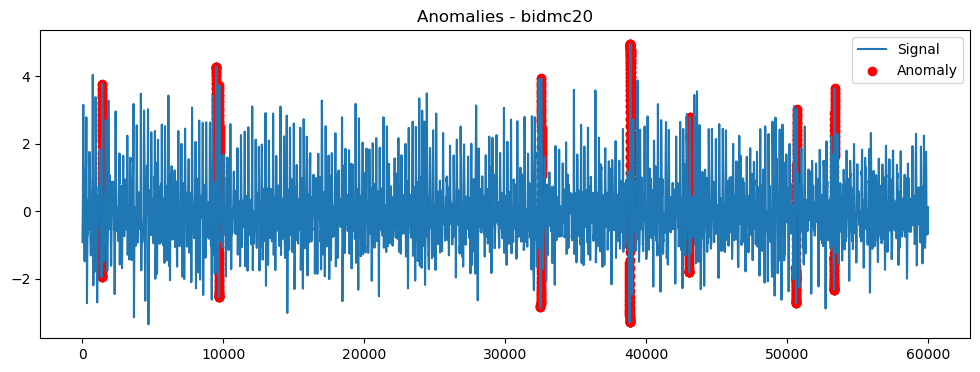

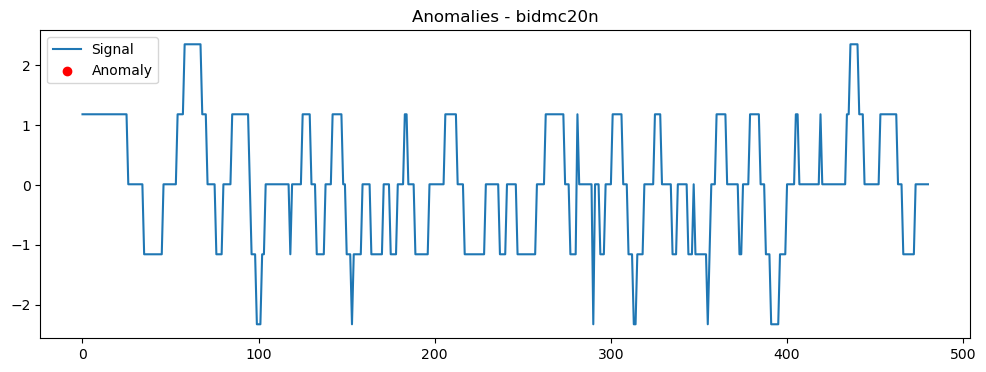

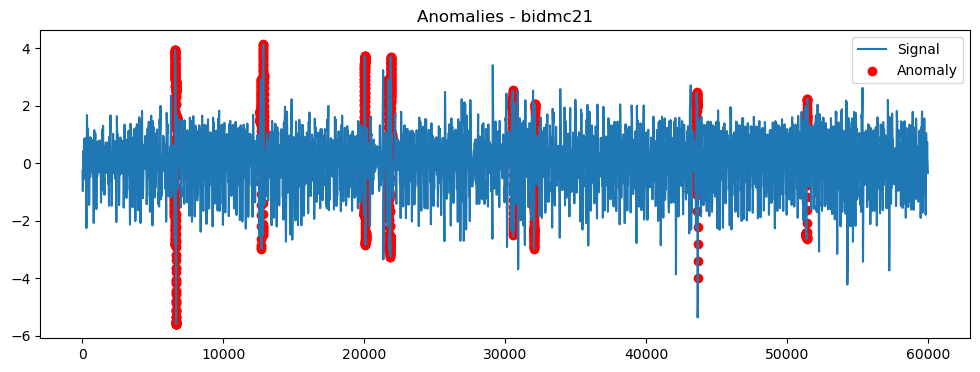

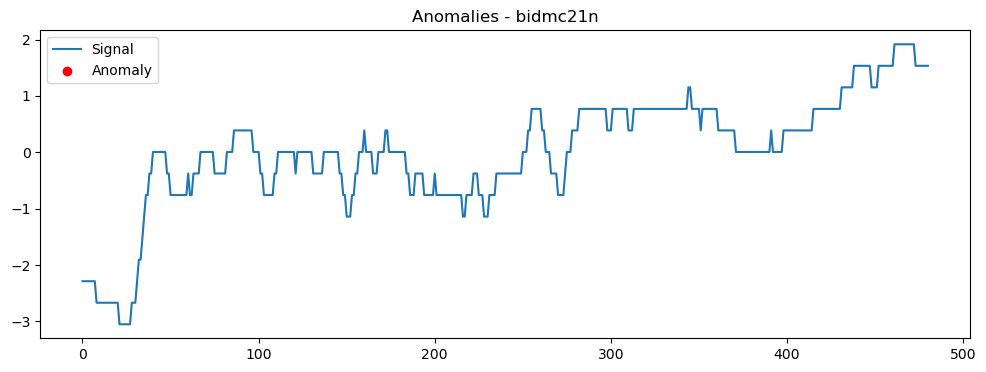

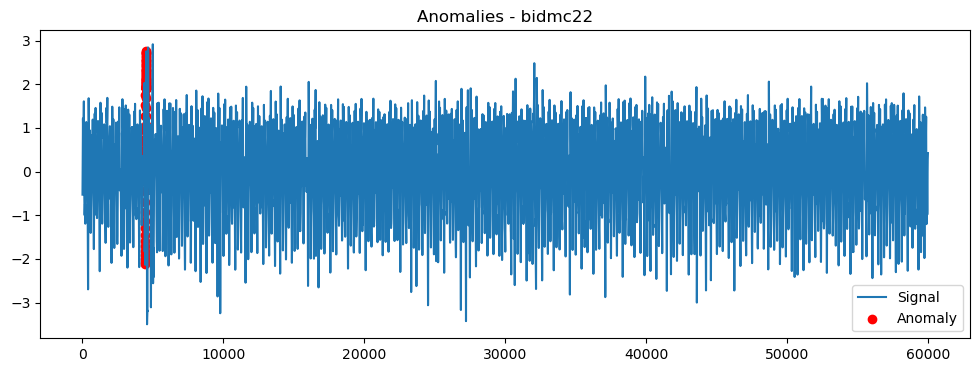

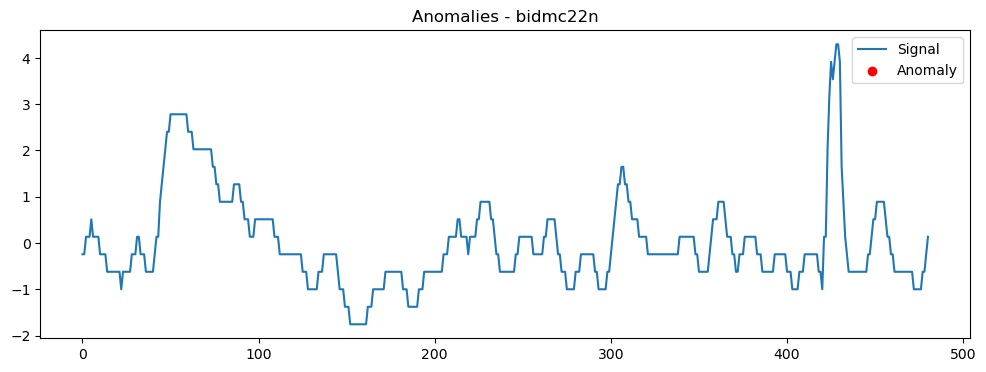

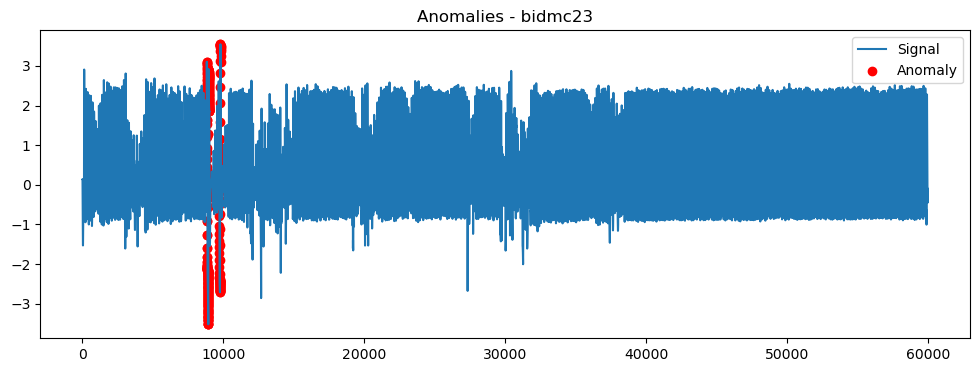

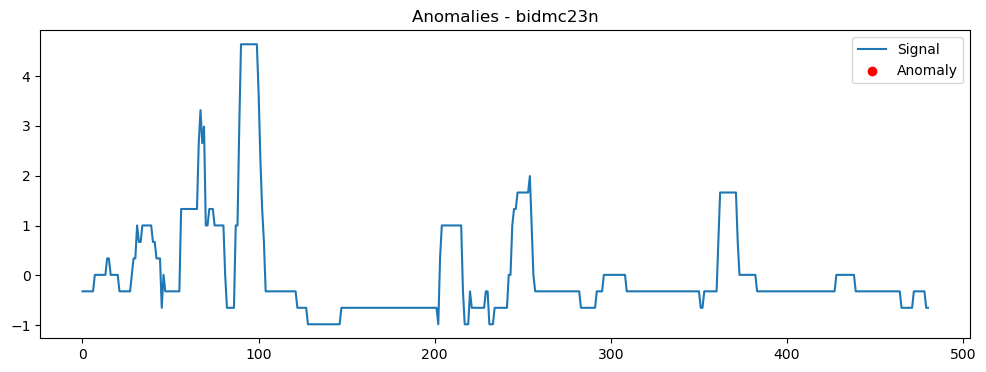

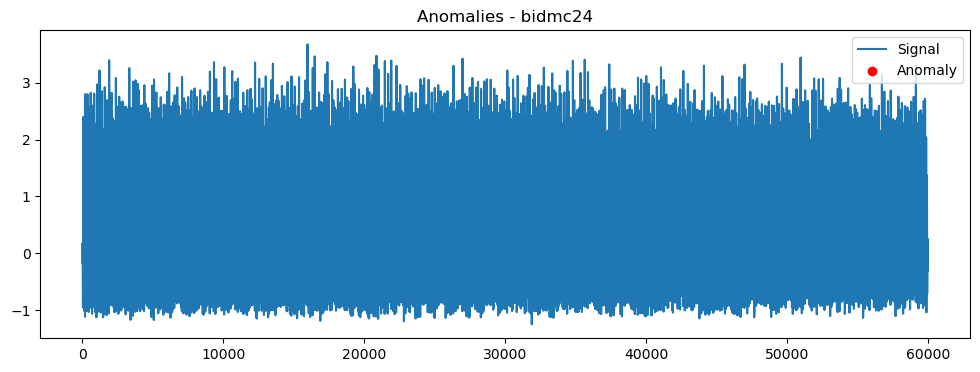

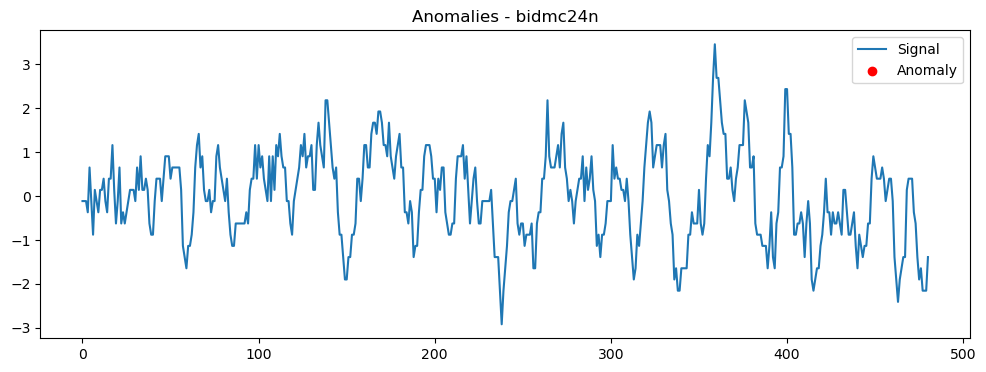

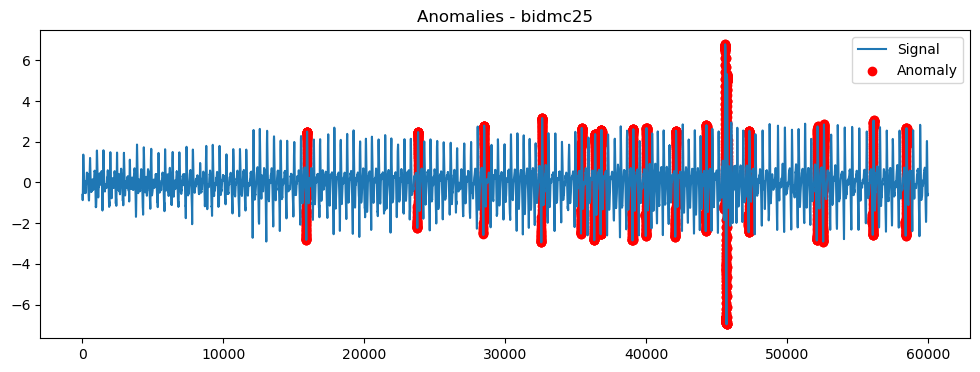

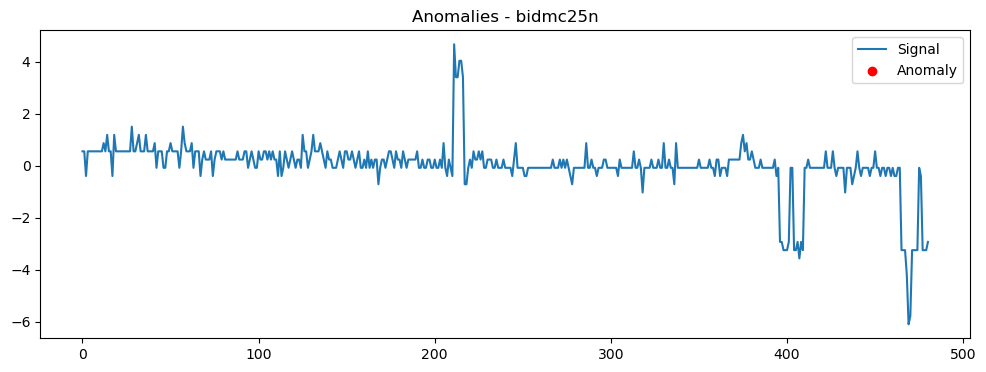

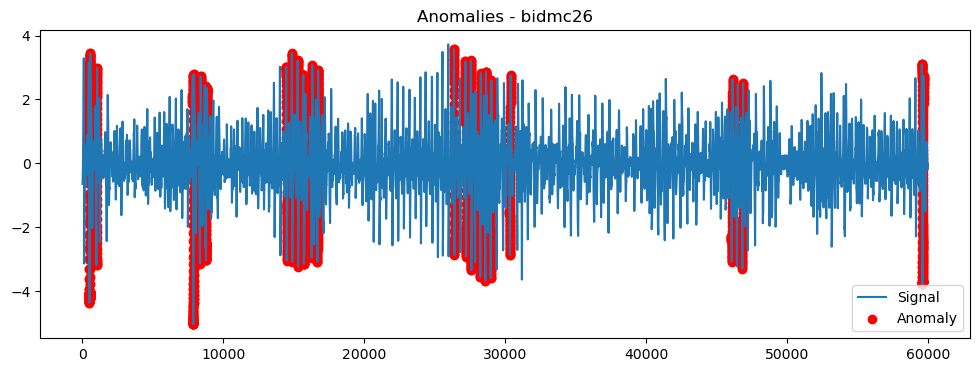

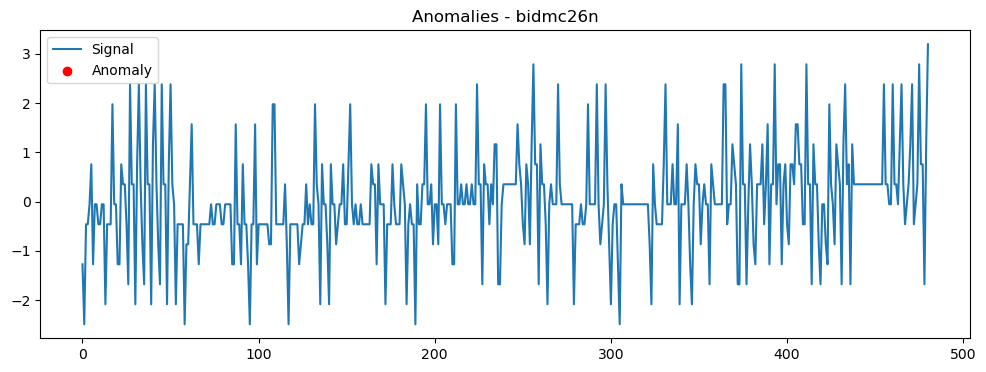

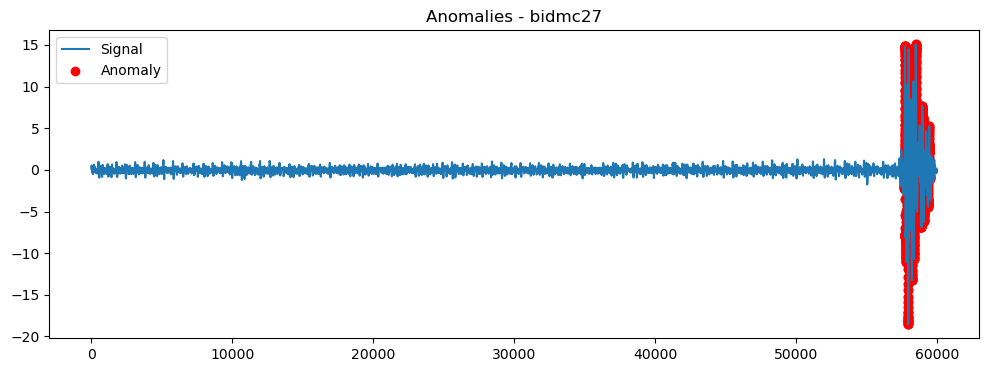

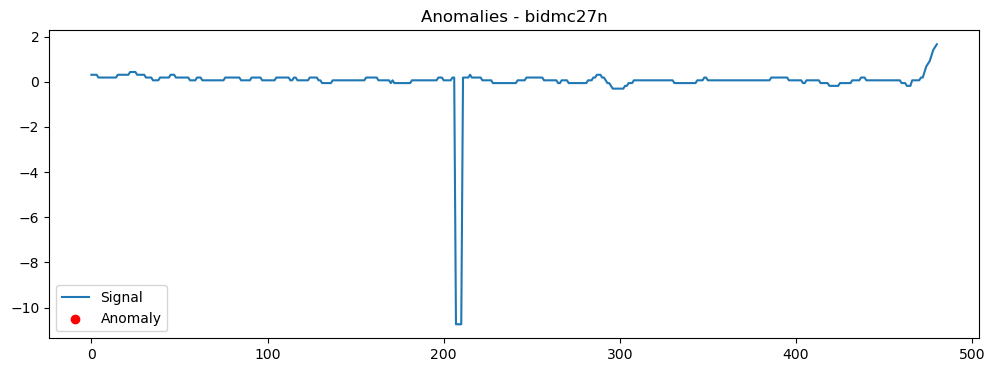

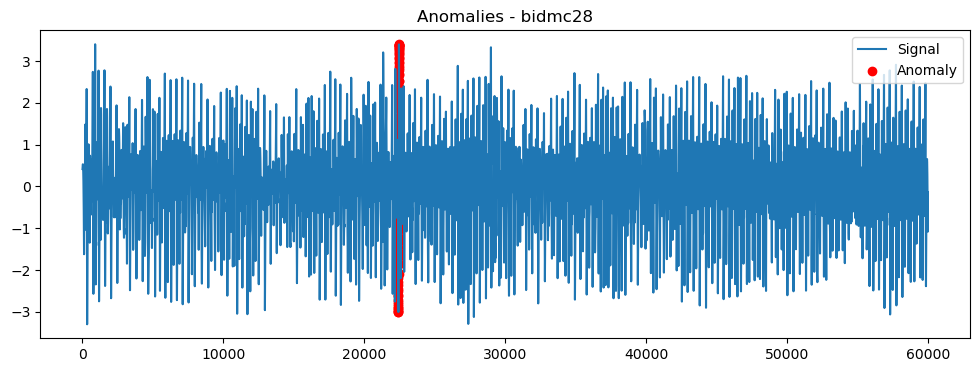

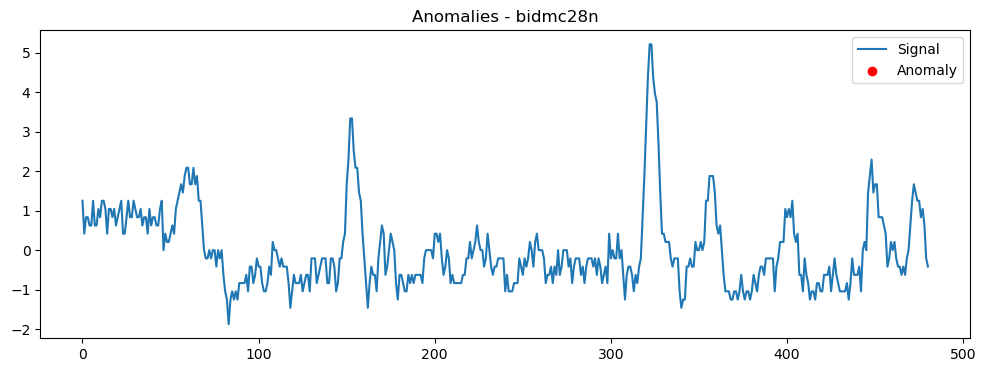

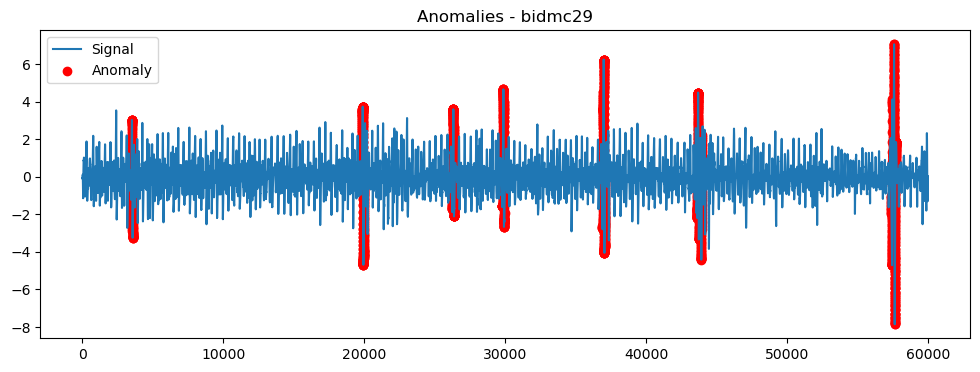

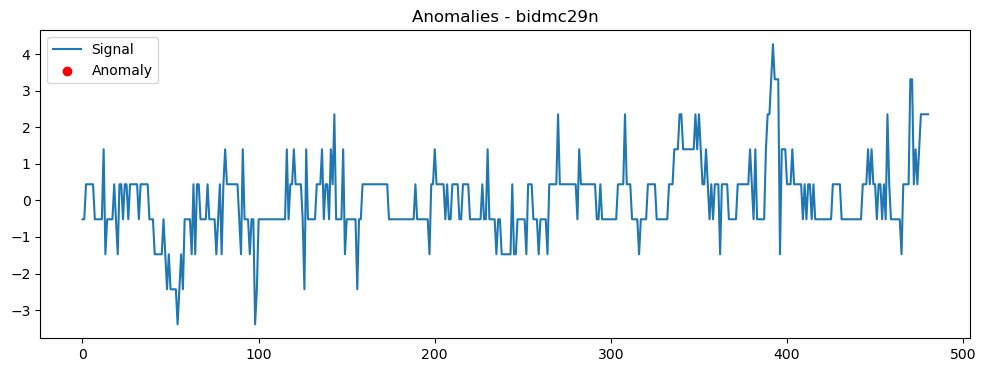

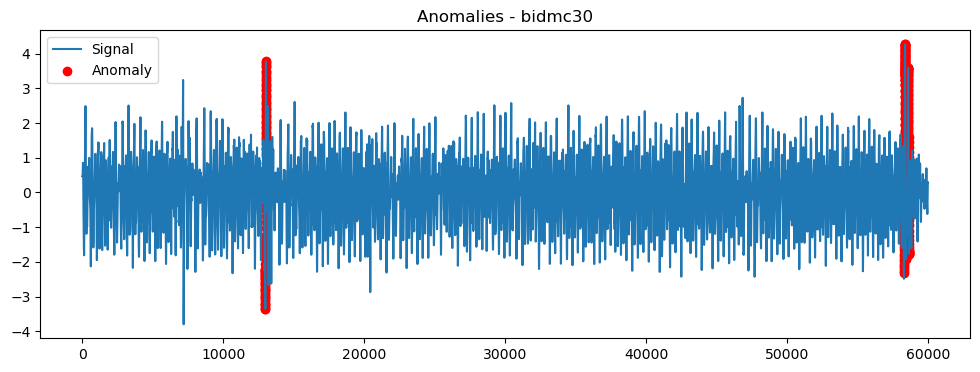

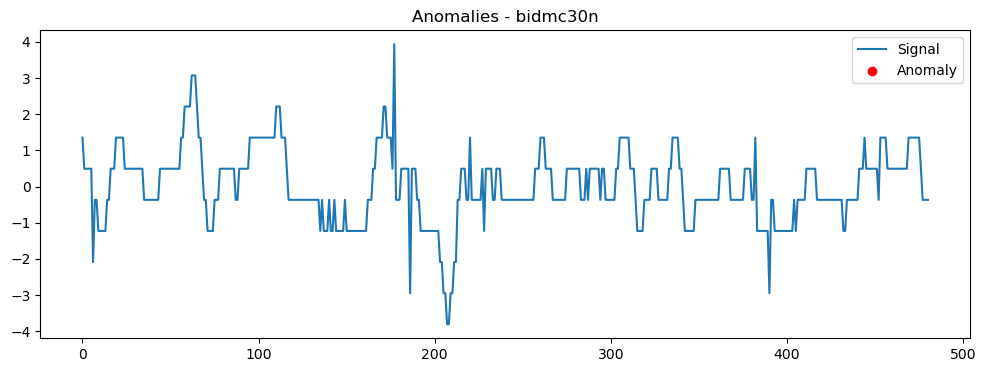

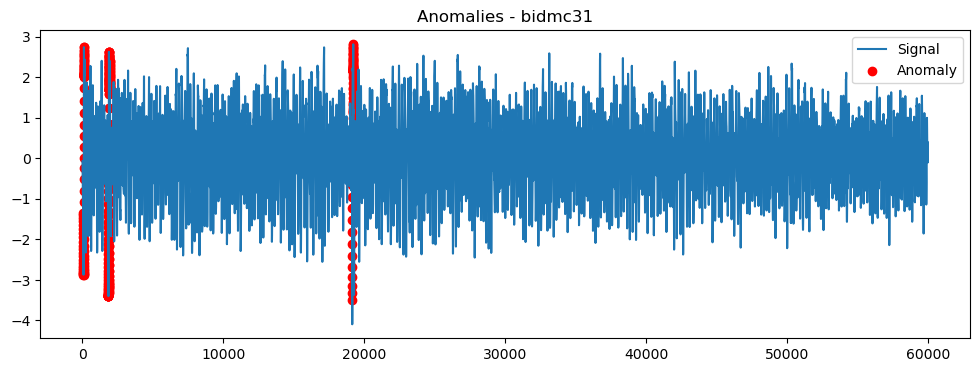

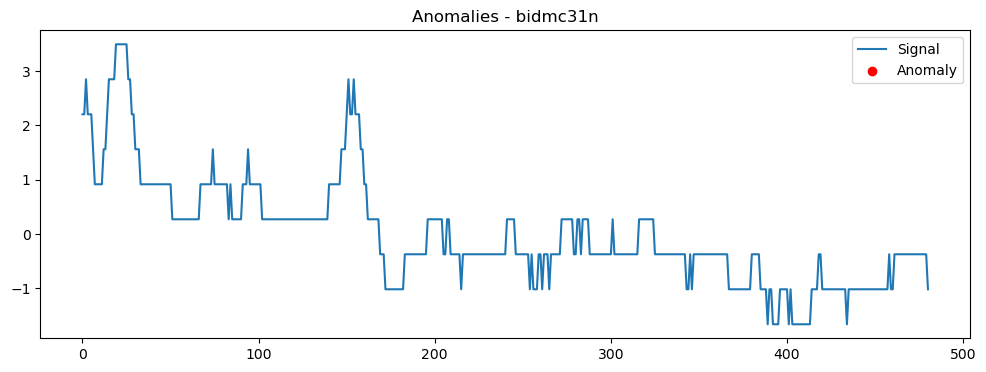

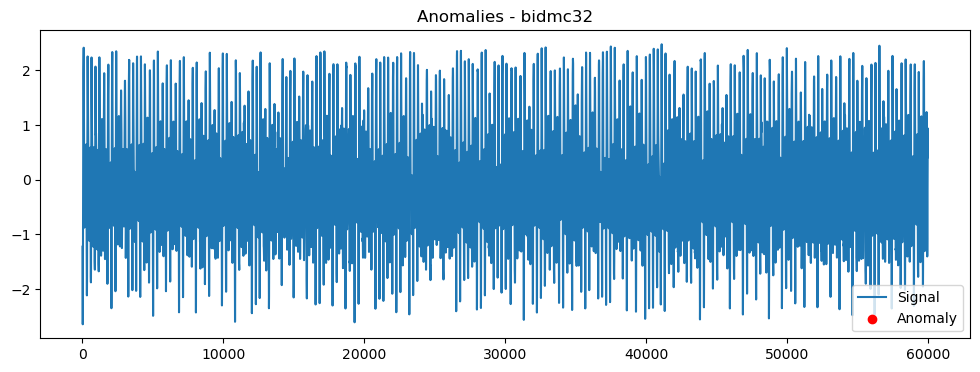

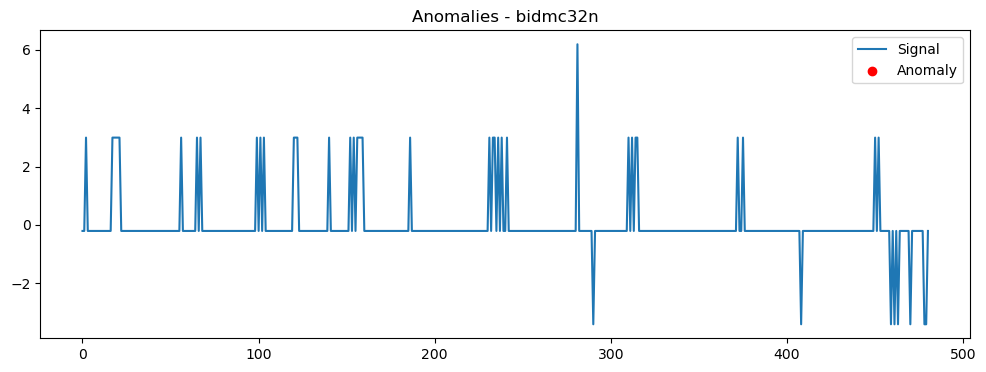

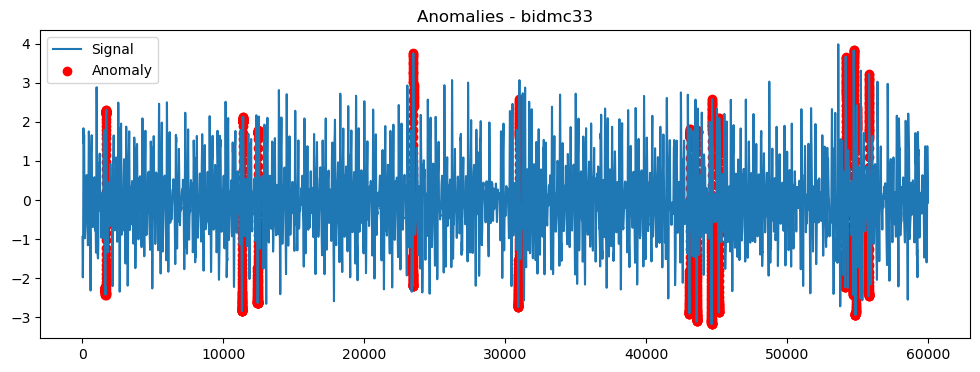

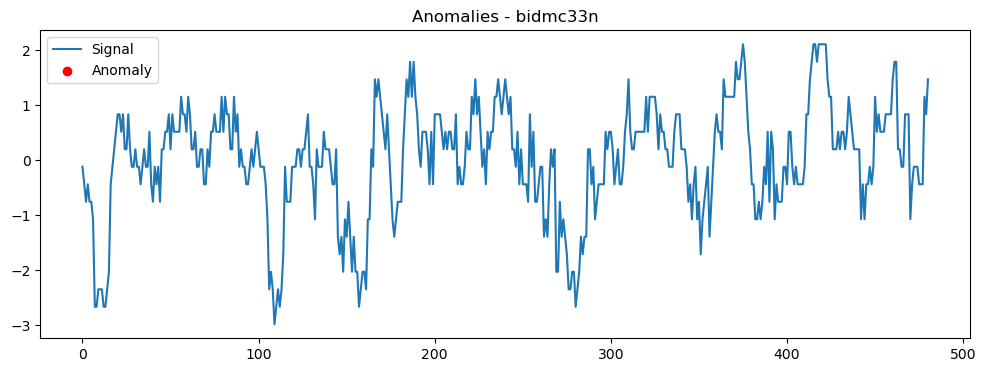

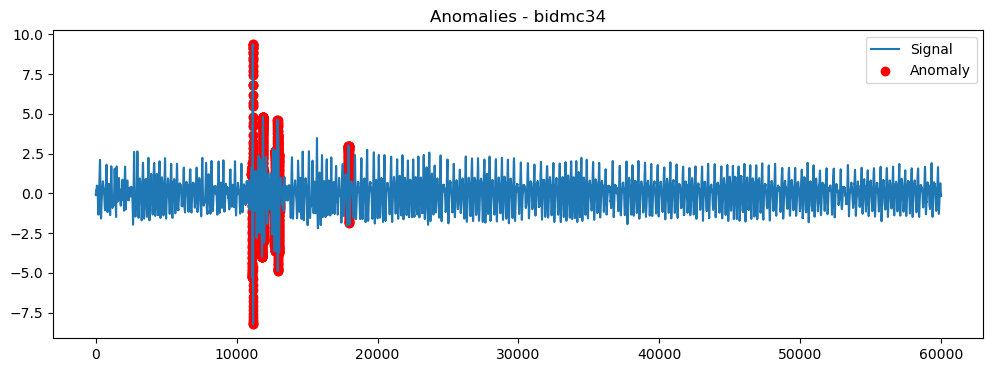

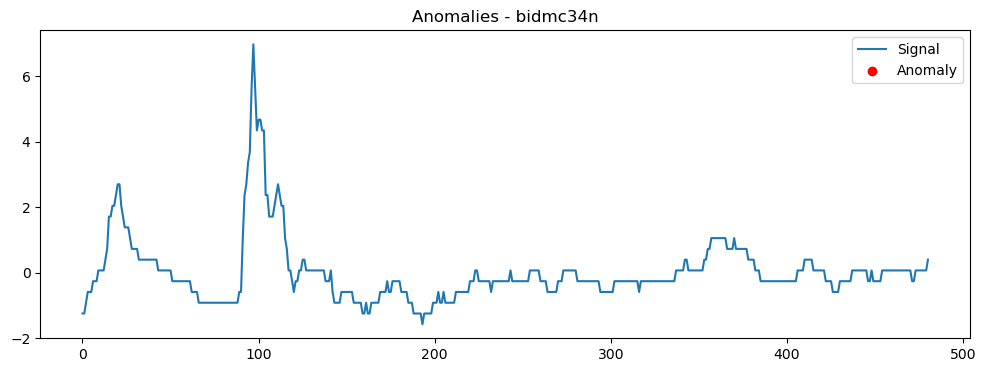

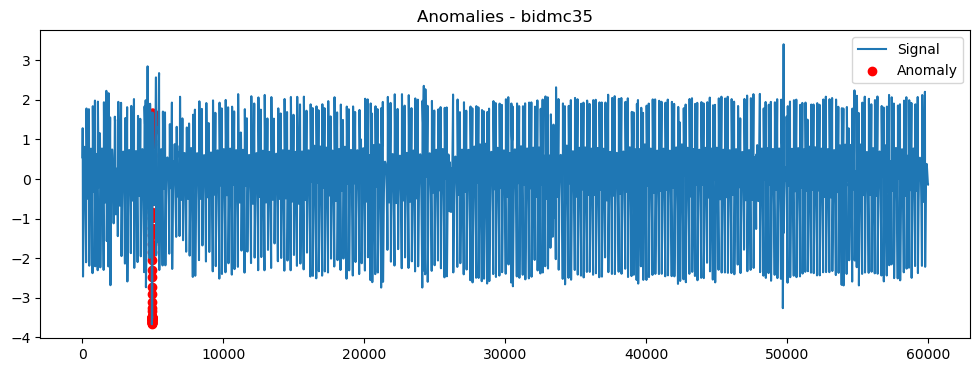

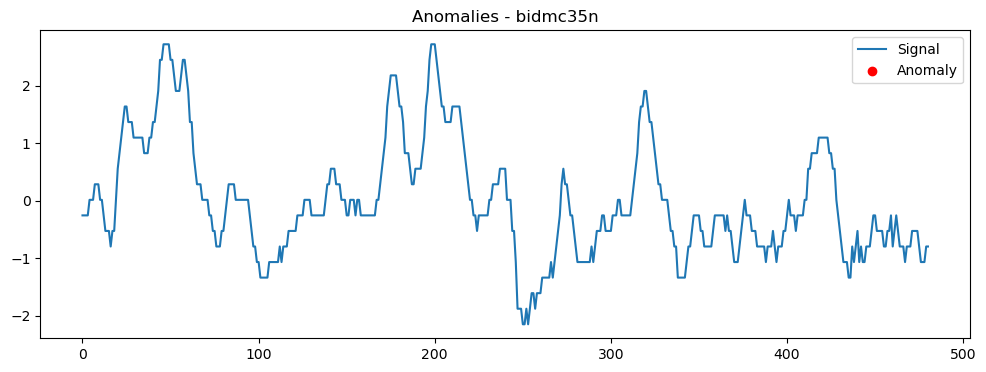

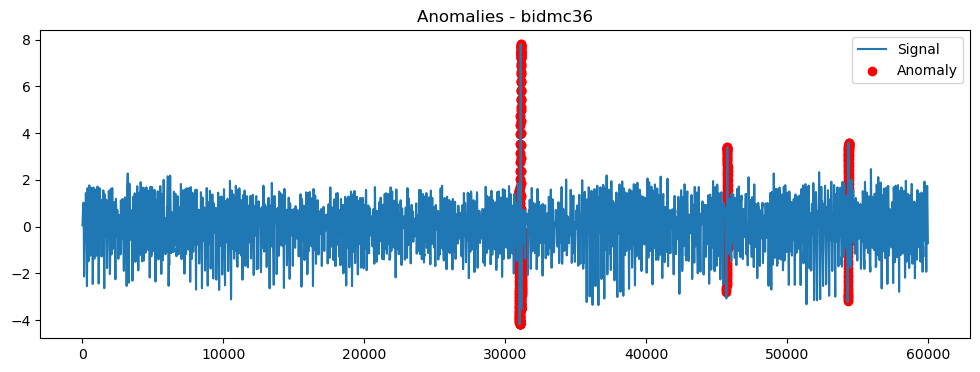

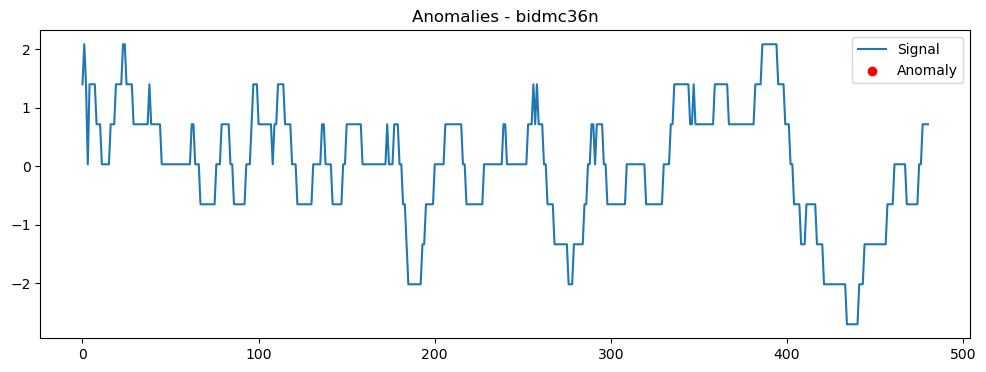

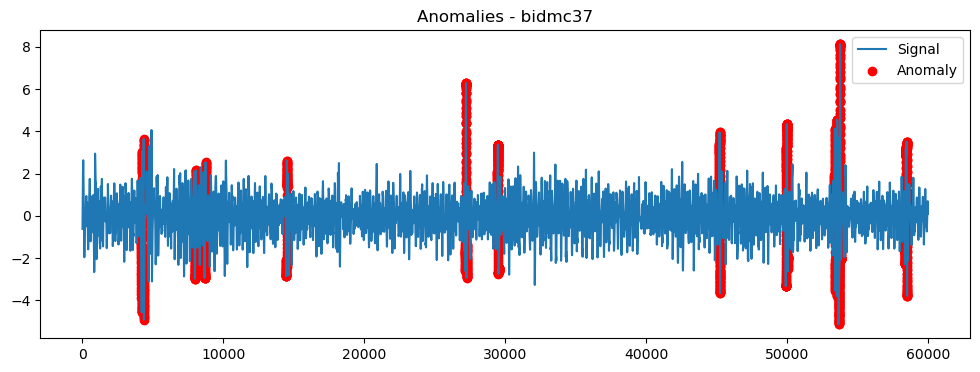

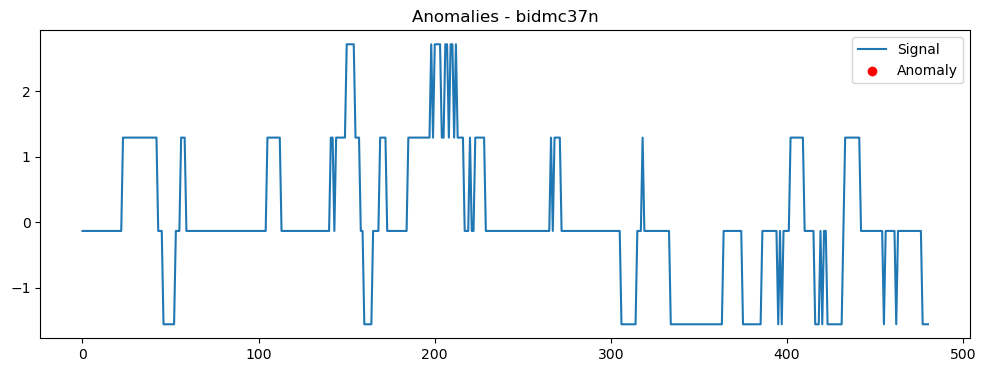

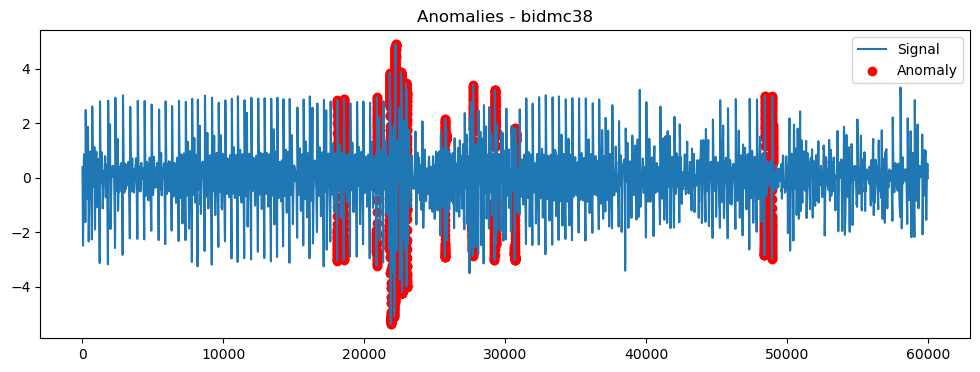

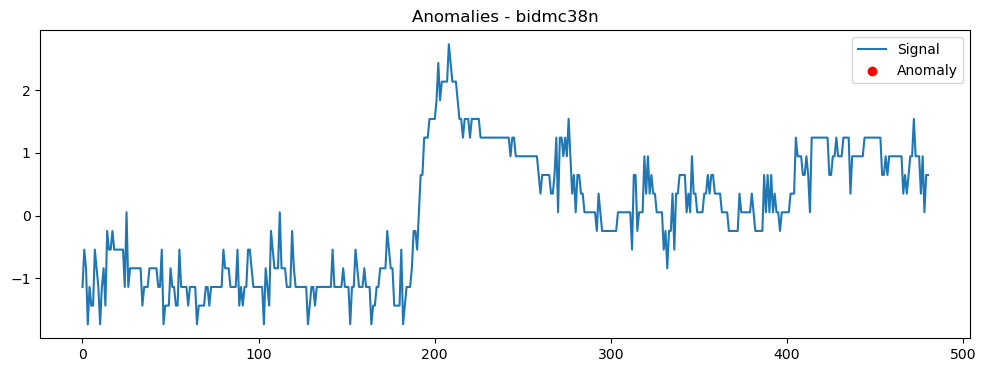

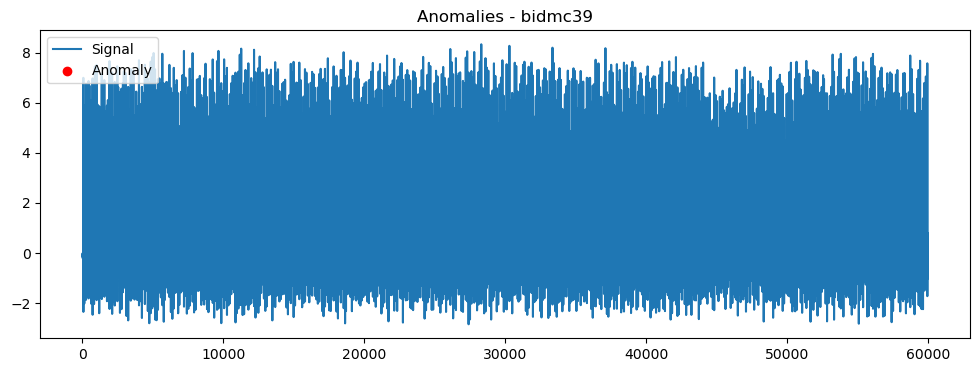

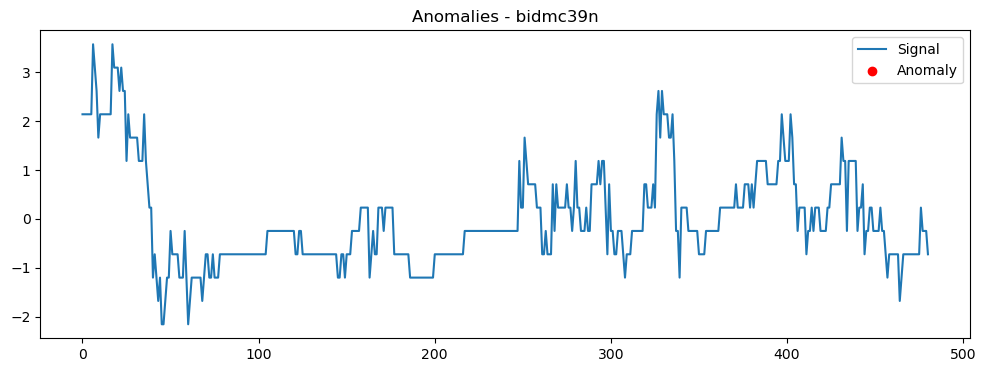

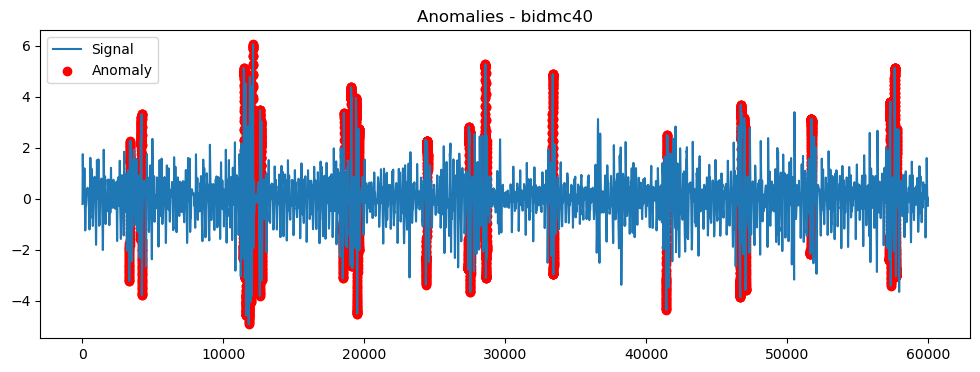

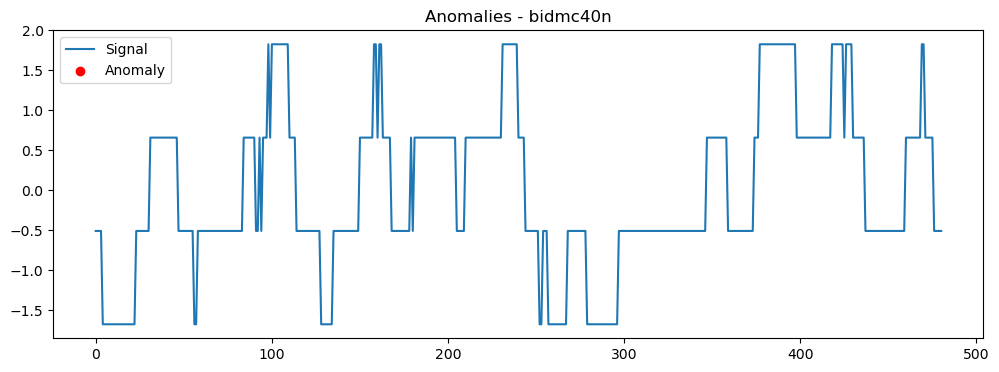

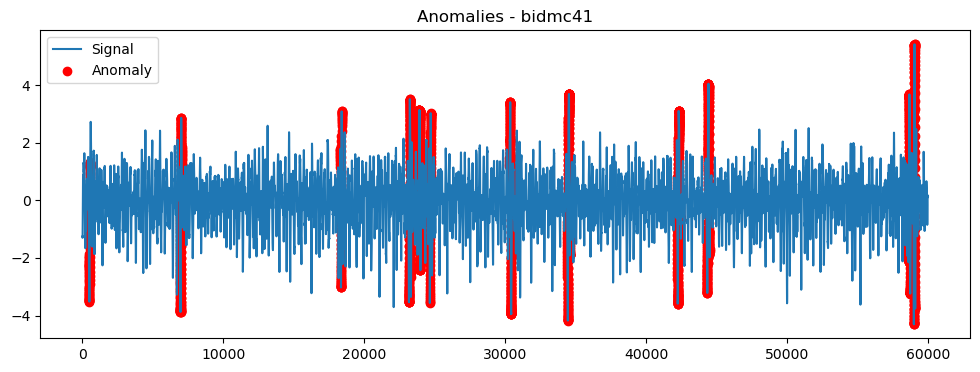

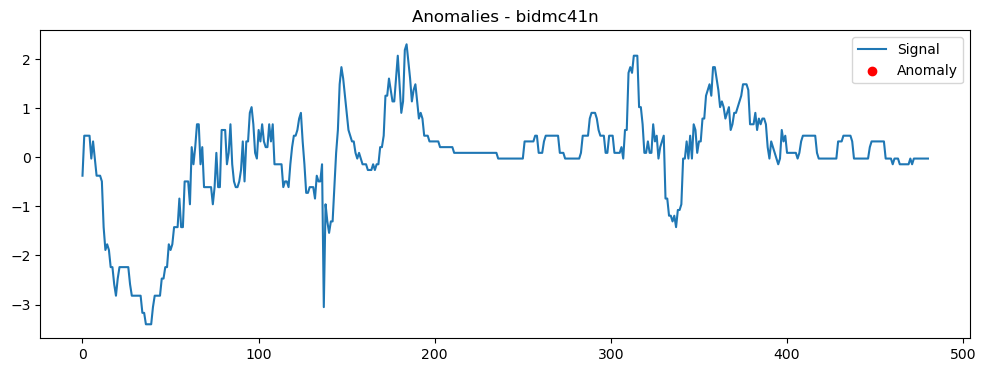

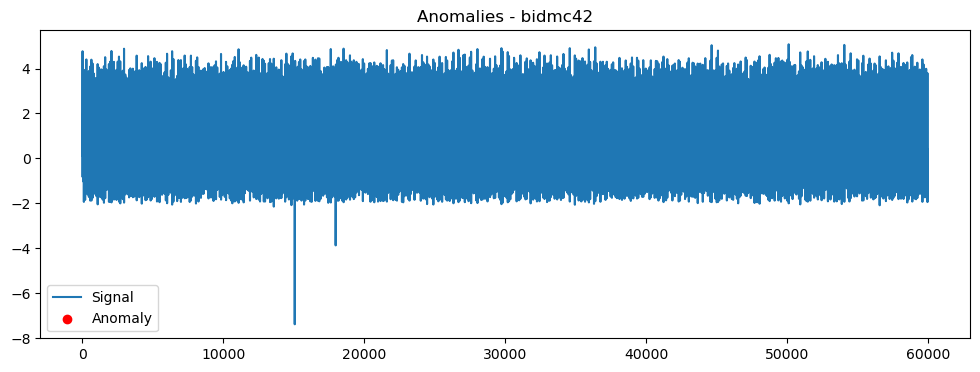

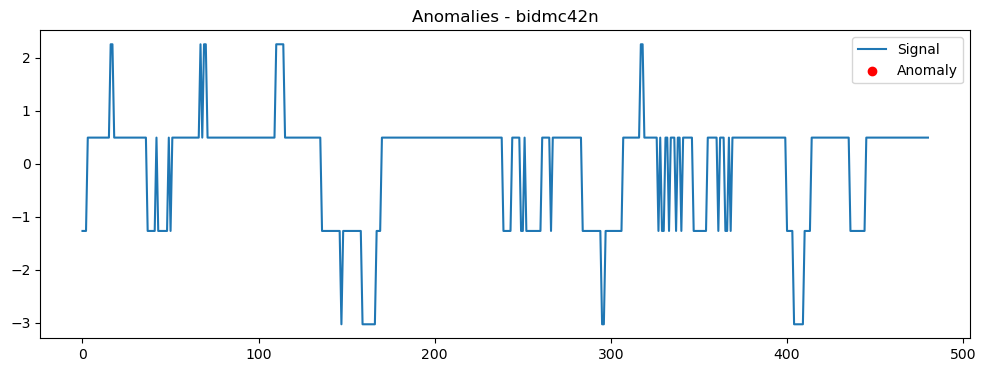

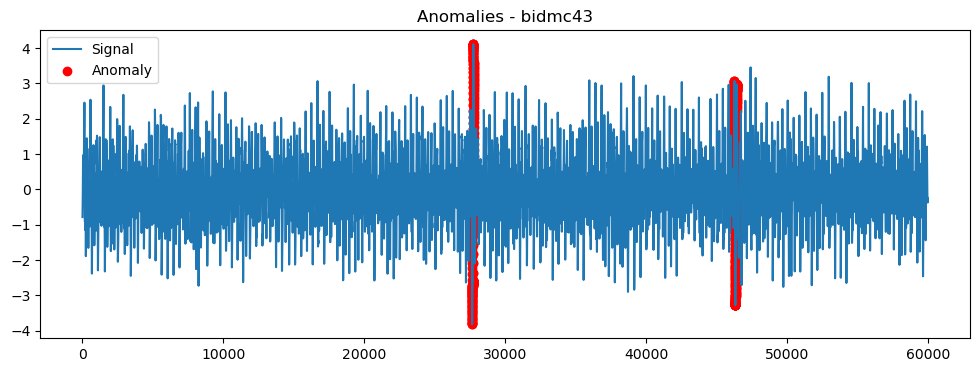

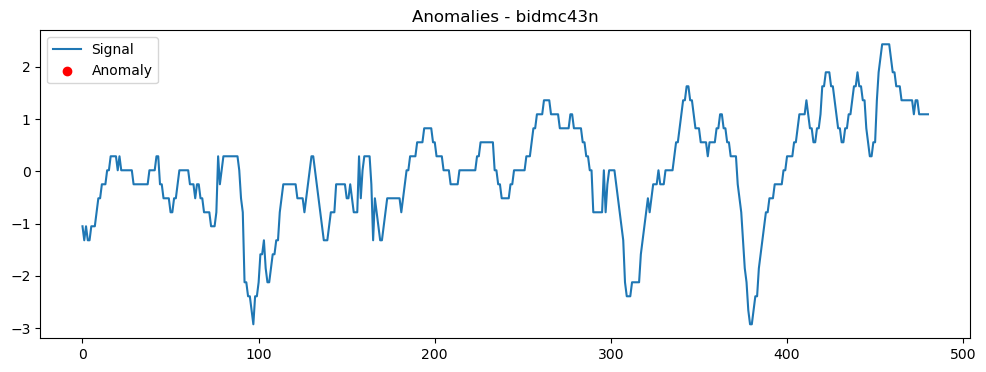

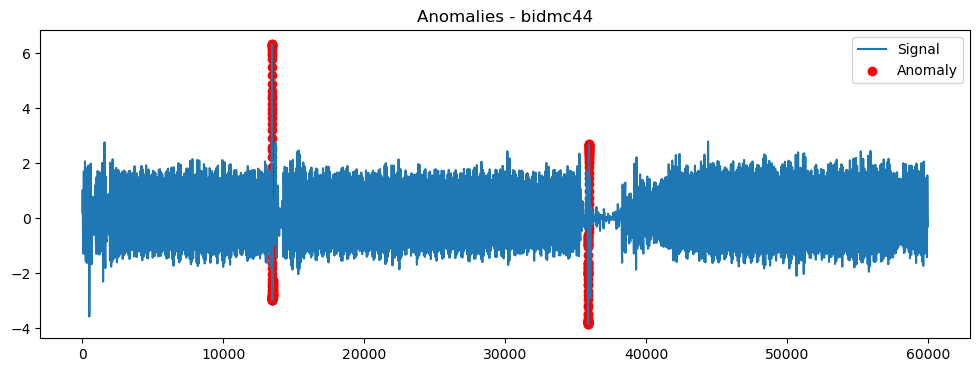

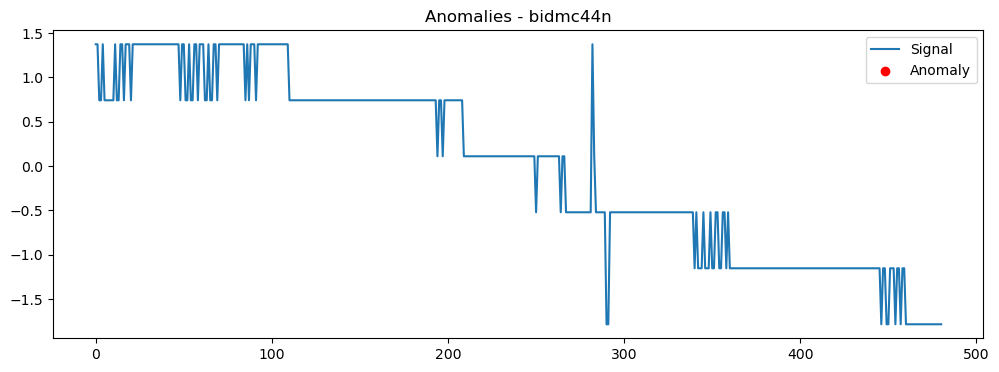

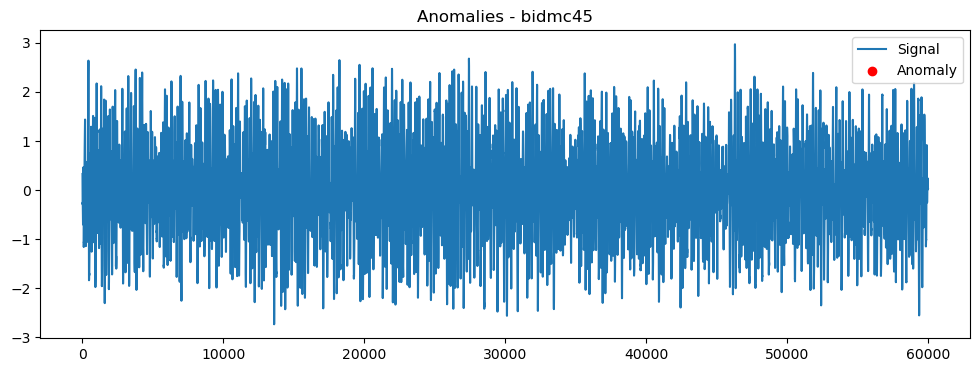

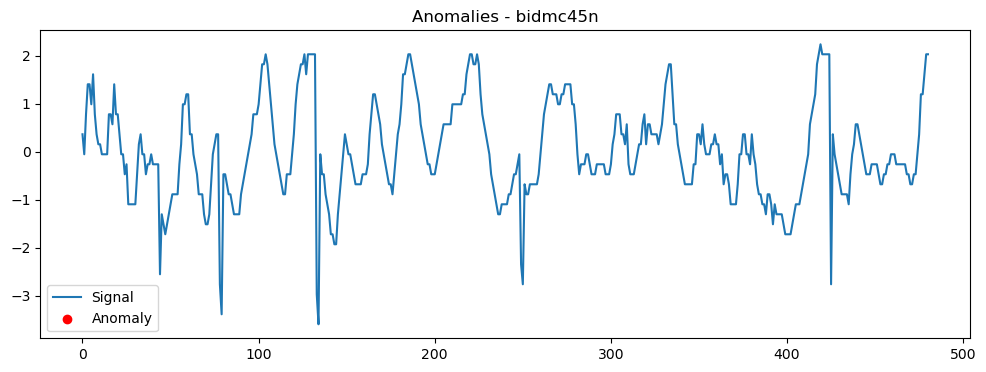

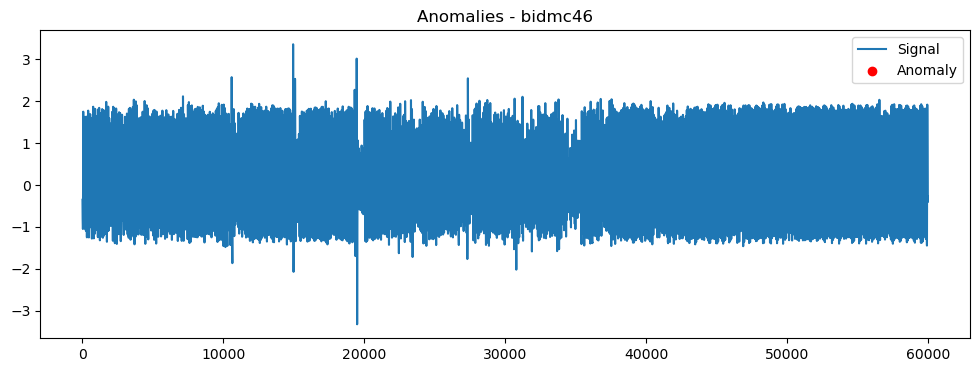

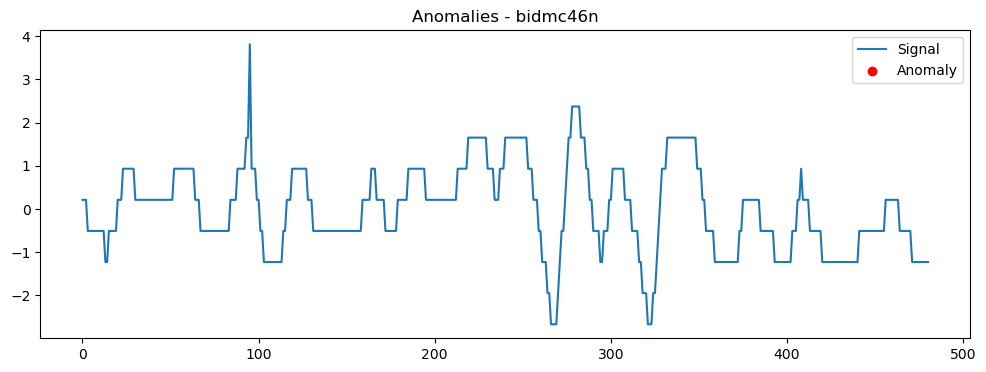

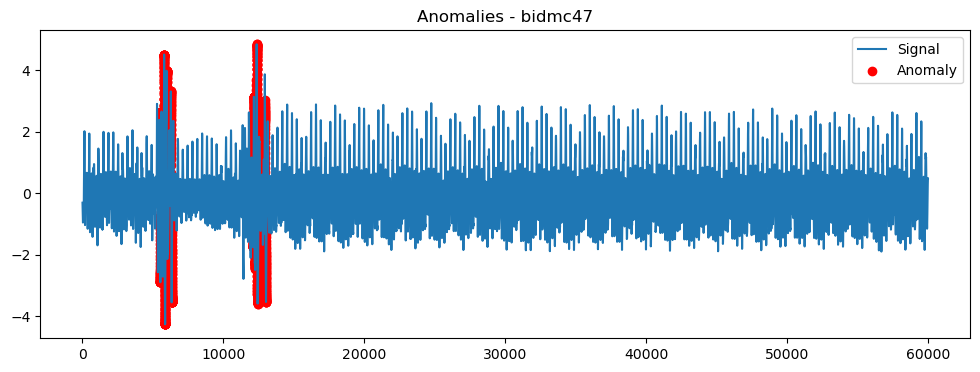

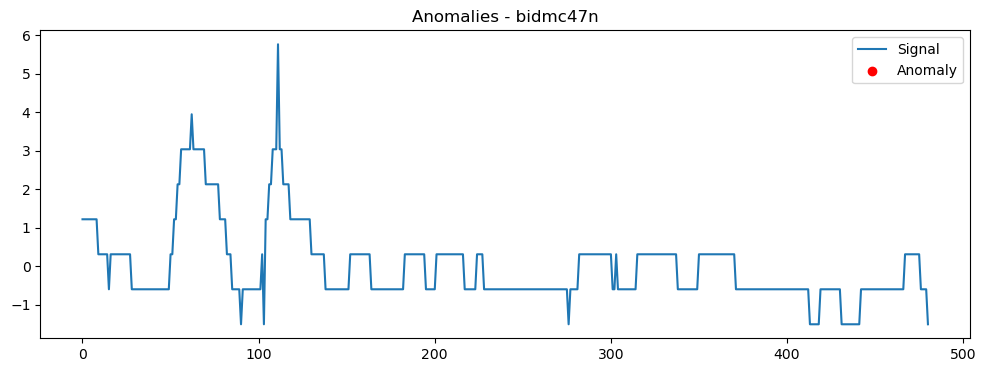

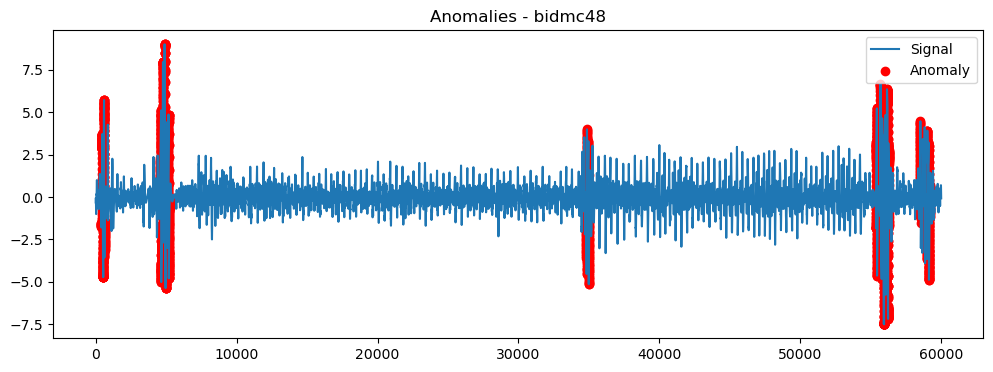

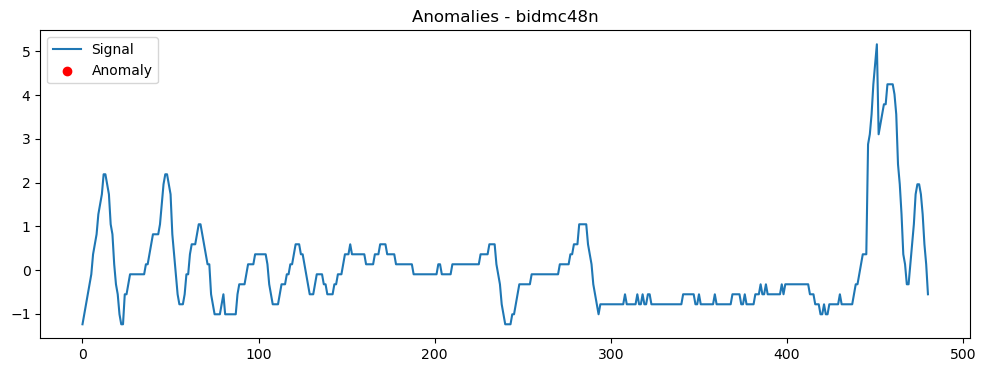

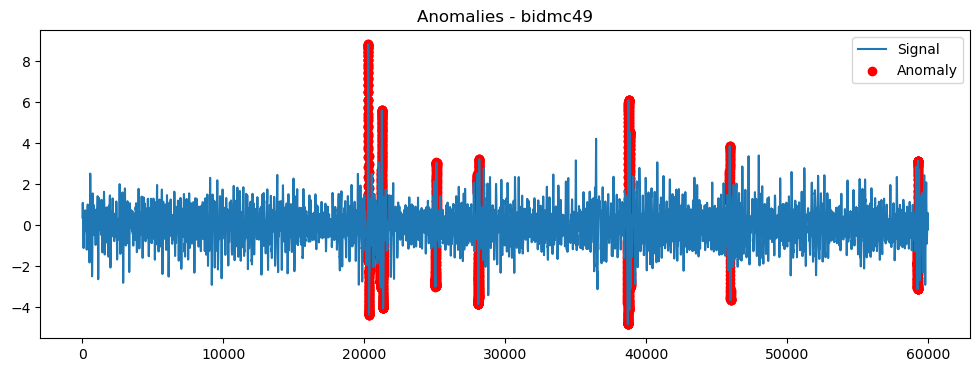

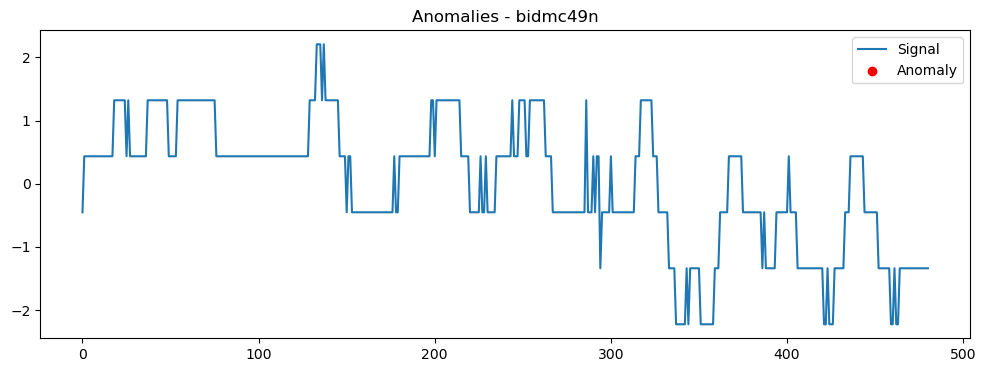

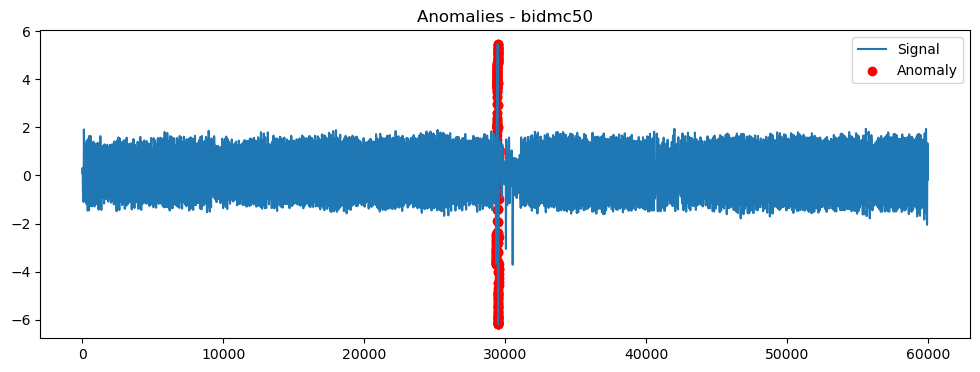

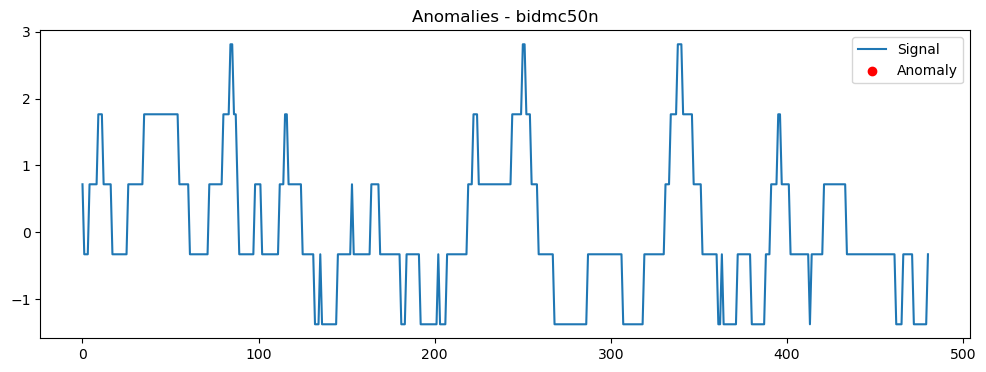

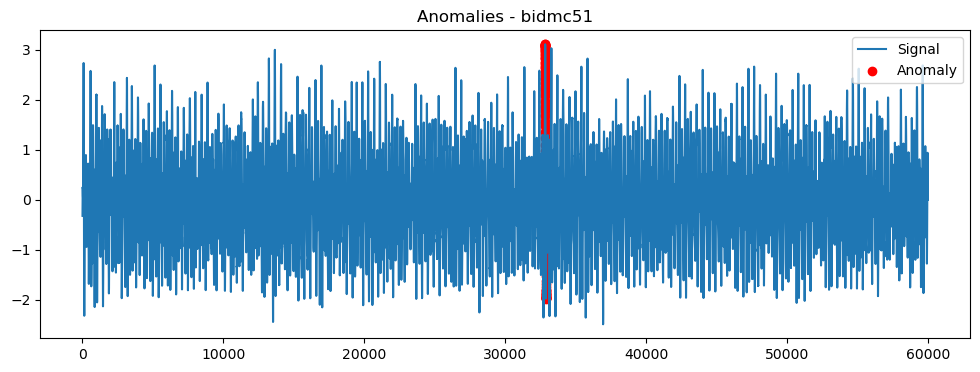

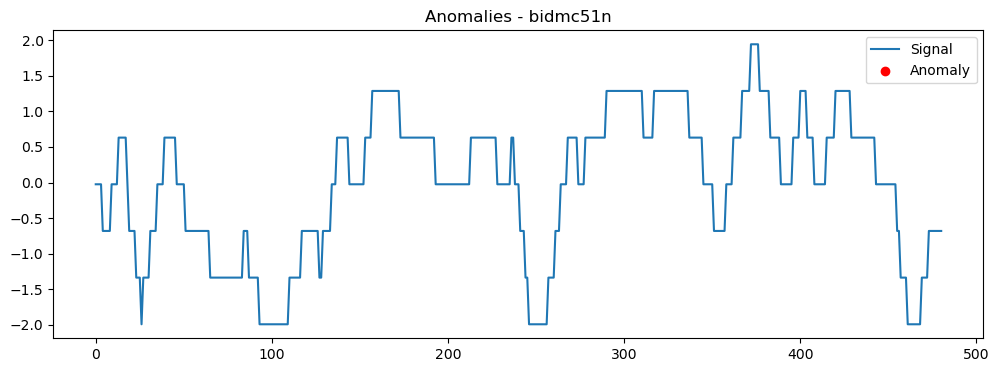

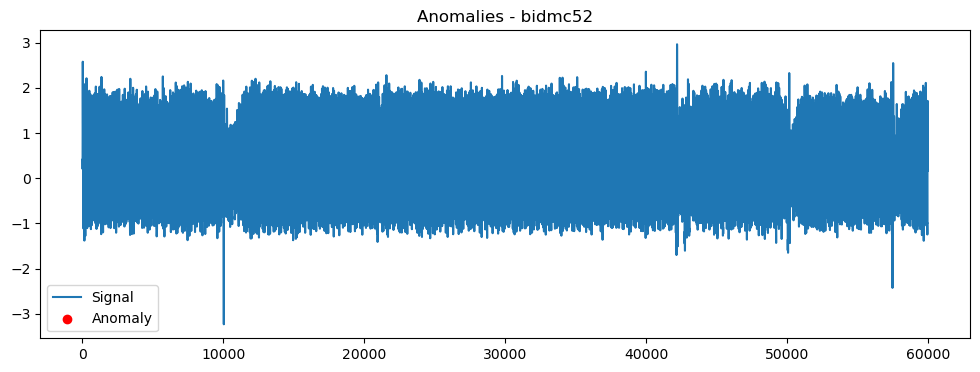

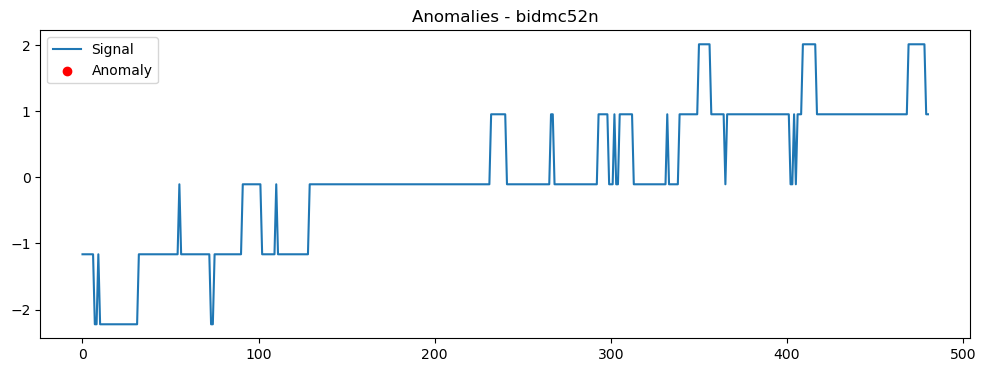

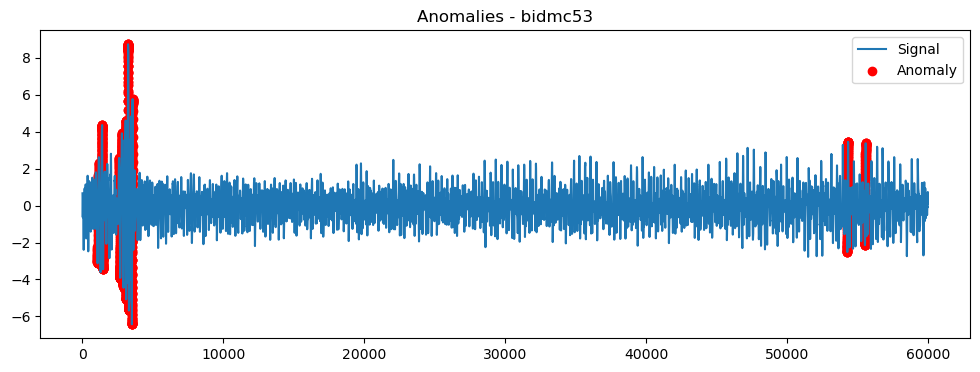

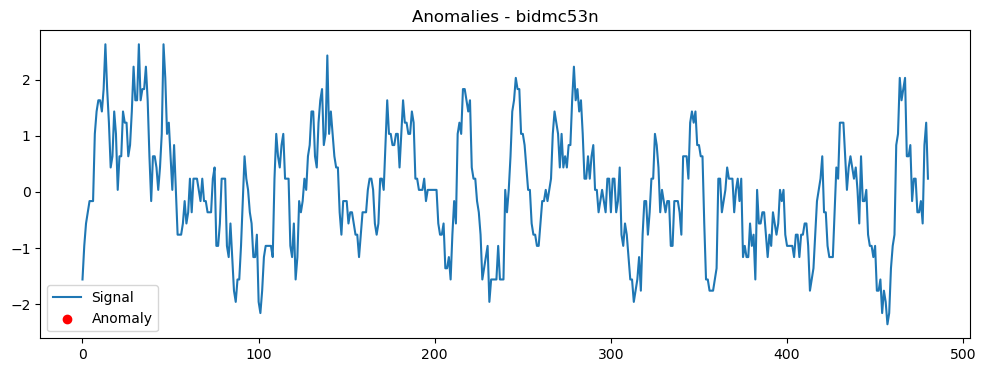

In [8]:
# -----------------------------
# Predict anomalies per patient
# -----------------------------
for patient in patient_files:
    signal = patient_signals[patient]
    windows = sliding_windows(signal, window_size, window_step)
    
    preds = model.predict(windows)
    
    # Map window anomalies to signal indices
    anomalies_idx = []
    for i, p in enumerate(preds):
        if p == -1:
            start = i * window_step
            anomalies_idx.extend(range(start, start + window_size))
    
    anomalies_idx = np.array(anomalies_idx, dtype=int)  # ensure integers
    anomalies_idx = anomalies_idx[anomalies_idx < len(signal)]
    
    # Plot anomalies
    plt.figure(figsize=(12,4))
    plt.plot(signal, label='Signal')
    plt.scatter(anomalies_idx, signal[anomalies_idx], color='red', label='Anomaly')
    plt.title(f'Anomalies - {patient}')
    plt.legend()
    plt.show()

In [10]:
import joblib
import os

# -----------------------------
# Save the trained model
# -----------------------------
#os.makedirs("saved_model", exist_ok=True)  # create folder if it doesn't exist
model_path = "C:\\Users\\NEHA\\Machine_Learning_Projects\\Anomaly detection in Time series data\\saved_model\\isolation_forest_model.pkl"

joblib.dump(model, model_path)
print(f"Model saved successfully at: {model_path}")

Model saved successfully at: C:\Users\NEHA\Machine_Learning_Projects\Anomaly detection in Time series data\saved_model\isolation_forest_model.pkl
